<a href="https://colab.research.google.com/github/shammah-anucha/Autoscout24-Car-Price-Prediction-Tool/blob/main/Germany_used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries

#Data Wrangling
import io
import numpy as np
import pandas as pd

#Data Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn
import matplotlib.colors as colors


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving autoscout24-germany-dataset.csv to autoscout24-germany-dataset.csv
Saving marketing_sample_for_autoscout24_de-autoparts__20200201_20200229__30k_data.csv to marketing_sample_for_autoscout24_de-autoparts__20200201_20200229__30k_data.csv


In [ ]:
germany_cars = pd.read_csv(io.BytesIO(uploaded['autoscout24-germany-dataset.csv']))
germany_cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [ ]:
combined_cars = pd.read_csv(io.BytesIO(uploaded['marketing_sample_for_autoscout24_de-autoparts__20200201_20200229__30k_data.csv']))
combined_cars.head()

,Uniq Id,Crawl Timestamp,Pageurl,Country,Make,Model Name,Mileage,First Registration,Power,Type,Body Type,Description Text
0,c681b07bf81fac6ade9074a2d0ce716b,2020-02-11 01:49:34 +0000,https://www.autoscout24.com/offers/skoda-fabia...,Spain,Skoda,Fabia,"193,000 km",12/2006,59 kW,Used,Station wagon,Skoda Fabia 1. 4 TDI 80cv. Motor muy fiable y ...
1,597e7936b4eea5c465e0ecd7a4b9beb7,2020-02-10 00:53:51 +0000,https://www.autoscout24.com/offers/citroen-ds3...,Germany,Citroen,DS3,"48,500 km",01/2013,115 kW,Used,Coupe,Polster: Leder Sitzheizung vorn Klimaautomatik...
2,dd359ff8c84b97d75bb15d40a1588223,2020-02-10 07:44:58 +0000,https://www.autoscout24.com/offers/fiat-500x-1...,Italy,Fiat,500X,10 km,12/2019,88 kW,Employee's car,Off-Road/Pick-up,PREZZO CON RITIRO AUTO USATA = € 17.990.00 Mes...
3,b10c30971ed6ead4c6851450105b7138,2020-02-09 19:37:56 +0000,https://www.autoscout24.com/offers/renault-sce...,Europe,Renault,Scenic,"95,000 km",04/2006,5 kW,Used,Other,GRANDIAUTO SRLÂ PROPONEÂ RENAULT MEGANE SCENIC...
4,c5568714c40c147d104452aba1aafd3a,2020-02-08 14:28:44 +0000,https://www.autoscout24.com/offers/bmw-118-ser...,Italy,BMW,118,"190,000 km",03/2007,90 kW,Used,Sedans,"Macchina in perfette condizioni, bollo pagato ..."


In [ ]:
germany_cars.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [ ]:
germany_cars.year.value_counts()

2020    4286
2013    4266
2016    4266
2019    4233
2017    4223
2018    4223
2012    4221
2015    4214
2021    4181
2014    4180
2011    4112
Name: year, dtype: int64

In [ ]:
combined_cars.dtypes

Uniq Id               object
Crawl Timestamp       object
Pageurl               object
Country               object
Make                  object
Model Name            object
Mileage               object
First Registration    object
Power                 object
Type                  object
Body Type             object
Description Text      object
dtype: object

In [ ]:
germany_cars.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [ ]:
germany_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [ ]:
germany_cars[germany_cars.columns].count()

mileage      46405
make         46405
model        46262
fuel         46405
gear         46223
offerType    46405
price        46405
hp           46376
year         46405
dtype: int64

In [ ]:
combined_cars.describe()

,Uniq Id,Crawl Timestamp,Pageurl,Country,Make,Model Name,Mileage,First Registration,Power,Type,Body Type,Description Text
count,30030,30030,30030,30030,30030,29891,30030,30030,30030,30030,29603,28406
unique,30030,28335,30030,9,97,905,12146,641,364,8,9,27951
top,c681b07bf81fac6ade9074a2d0ce716b,2020-02-09 10:50:26 +0000,https://www.autoscout24.com/offers/skoda-fabia...,Europe,Volkswagen,Golf,- km,-/-,110 kW,Used,Sedans,{}
freq,1,4,1,13607,3295,806,1817,2729,2928,22414,8410,76


In [ ]:
combined_cars[combined_cars.columns].count()

Uniq Id               30030
Crawl Timestamp       30030
Pageurl               30030
Country               30030
Make                  30030
Model Name            29891
Mileage               30030
First Registration    30030
Power                 30030
Type                  30030
Body Type             29603
Description Text      28406
dtype: int64

In [ ]:
germany_cars.shape

(46405, 9)

In [ ]:
combined_cars.shape

(30030, 12)

In [ ]:
combined_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30030 entries, 0 to 30029
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Uniq Id             30030 non-null  object
 1   Crawl Timestamp     30030 non-null  object
 2   Pageurl             30030 non-null  object
 3   Country             30030 non-null  object
 4   Make                30030 non-null  object
 5   Model Name          29891 non-null  object
 6   Mileage             30030 non-null  object
 7   First Registration  30030 non-null  object
 8   Power               30030 non-null  object
 9   Type                30030 non-null  object
 10  Body Type           29603 non-null  object
 11  Description Text    28406 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


# **Data Preparation**


1.   Data Cleaning
2.   Data Transformation:


*   dropping columns from combined cars; Uniq Id, Crawl Timestamp. Removing the column changes the shape to (30030, 10). These columns are not needed for the analysis.
*  Select only rows with Germany cars for price proration


*   Change column name to match first dataset
*   The page url and description text contains information about the cars like fuel type and price, also if it is automatic or manual. I have to somehow extract this information from the text. Using regex to extract keywords from text




3.   Data Integration



In [ ]:
combined_cars_transformed = combined_cars.drop(columns=['Uniq Id', 'Crawl Timestamp'])
combined_cars_transformed.head()

,Pageurl,Country,Make,Model Name,Mileage,First Registration,Power,Type,Body Type,Description Text
0,https://www.autoscout24.com/offers/skoda-fabia...,Spain,Skoda,Fabia,"193,000 km",12/2006,59 kW,Used,Station wagon,Skoda Fabia 1. 4 TDI 80cv. Motor muy fiable y ...
1,https://www.autoscout24.com/offers/citroen-ds3...,Germany,Citroen,DS3,"48,500 km",01/2013,115 kW,Used,Coupe,Polster: Leder Sitzheizung vorn Klimaautomatik...
2,https://www.autoscout24.com/offers/fiat-500x-1...,Italy,Fiat,500X,10 km,12/2019,88 kW,Employee's car,Off-Road/Pick-up,PREZZO CON RITIRO AUTO USATA = € 17.990.00 Mes...
3,https://www.autoscout24.com/offers/renault-sce...,Europe,Renault,Scenic,"95,000 km",04/2006,5 kW,Used,Other,GRANDIAUTO SRLÂ PROPONEÂ RENAULT MEGANE SCENIC...
4,https://www.autoscout24.com/offers/bmw-118-ser...,Italy,BMW,118,"190,000 km",03/2007,90 kW,Used,Sedans,"Macchina in perfette condizioni, bollo pagato ..."


In [ ]:
combined_cars_transformed.shape

(30030, 10)

In [ ]:
combined_cars_germany = combined_cars_transformed.loc[(combined_cars_transformed.Country=='Germany')]
combined_cars_germany.head()

,Pageurl,Country,Make,Model Name,Mileage,First Registration,Power,Type,Body Type,Description Text
1,https://www.autoscout24.com/offers/citroen-ds3...,Germany,Citroen,DS3,"48,500 km",01/2013,115 kW,Used,Coupe,Polster: Leder Sitzheizung vorn Klimaautomatik...
12,https://www.autoscout24.com/offers/seat-alhamb...,Germany,SEAT,Alhambra,"69,000 km",02/2015,130 kW,Used,Van,Sonderausstattung: Anhängerkupplung (Kugelkopf...
13,https://www.autoscout24.com/offers/opel-mokka-...,Germany,Opel,Mokka,"107,000 km",12/2015,100 kW,Used,Off-Road/Pick-up,Airbag-Deaktivierung Beifahrerseite Anhängerzu...
14,https://www.autoscout24.com/offers/dacia-sande...,Germany,Dacia,Sandero,6 km,-/-,74 kW,New,Compact,Modell: Facelift-Modell; 3 Jahre Werksgarantie...
18,https://www.autoscout24.com/offers/opel-corsa-...,Germany,Opel,Corsa,"16,892 km",02/2019,66 kW,Used,Compact,Getriebe: Schaltgetriebe Technik: Bordcomputer...


In [ ]:
combined_cars_germany.shape

(7823, 10)

In [ ]:
combined_cars_germany_removed = combined_cars_germany.drop(columns=['Country']).reset_index()
combined_cars_germany_removed = combined_cars_germany_removed.drop(columns=['index'])
combined_cars_germany_removed.head()

,Pageurl,Make,Model Name,Mileage,First Registration,Power,Type,Body Type,Description Text
0,https://www.autoscout24.com/offers/citroen-ds3...,Citroen,DS3,"48,500 km",01/2013,115 kW,Used,Coupe,Polster: Leder Sitzheizung vorn Klimaautomatik...
1,https://www.autoscout24.com/offers/seat-alhamb...,SEAT,Alhambra,"69,000 km",02/2015,130 kW,Used,Van,Sonderausstattung: Anhängerkupplung (Kugelkopf...
2,https://www.autoscout24.com/offers/opel-mokka-...,Opel,Mokka,"107,000 km",12/2015,100 kW,Used,Off-Road/Pick-up,Airbag-Deaktivierung Beifahrerseite Anhängerzu...
3,https://www.autoscout24.com/offers/dacia-sande...,Dacia,Sandero,6 km,-/-,74 kW,New,Compact,Modell: Facelift-Modell; 3 Jahre Werksgarantie...
4,https://www.autoscout24.com/offers/opel-corsa-...,Opel,Corsa,"16,892 km",02/2019,66 kW,Used,Compact,Getriebe: Schaltgetriebe Technik: Bordcomputer...


In [ ]:
pageurl = combined_cars_germany_removed[['Pageurl']]
pageurl.head()

,Pageurl
0,https://www.autoscout24.com/offers/citroen-ds3...
1,https://www.autoscout24.com/offers/seat-alhamb...
2,https://www.autoscout24.com/offers/opel-mokka-...
3,https://www.autoscout24.com/offers/dacia-sande...
4,https://www.autoscout24.com/offers/opel-corsa-...


In [ ]:
import re

combined_cars_germany_removed["Fuel"] = combined_cars_germany_removed["Pageurl"].str.extract(r'(electric-gasoline|gasoline|diesel|electric)')
combined_cars_germany_removed

,Pageurl,Make,Model Name,Mileage,First Registration,Power,Type,Body Type,Description Text,Fuel
0,https://www.autoscout24.com/offers/citroen-ds3...,Citroen,DS3,"48,500 km",01/2013,115 kW,Used,Coupe,Polster: Leder Sitzheizung vorn Klimaautomatik...,gasoline
1,https://www.autoscout24.com/offers/seat-alhamb...,SEAT,Alhambra,"69,000 km",02/2015,130 kW,Used,Van,Sonderausstattung: Anhängerkupplung (Kugelkopf...,diesel
2,https://www.autoscout24.com/offers/opel-mokka-...,Opel,Mokka,"107,000 km",12/2015,100 kW,Used,Off-Road/Pick-up,Airbag-Deaktivierung Beifahrerseite Anhängerzu...,diesel
3,https://www.autoscout24.com/offers/dacia-sande...,Dacia,Sandero,6 km,-/-,74 kW,New,Compact,Modell: Facelift-Modell; 3 Jahre Werksgarantie...,NaN
4,https://www.autoscout24.com/offers/opel-corsa-...,Opel,Corsa,"16,892 km",02/2019,66 kW,Used,Compact,Getriebe: Schaltgetriebe Technik: Bordcomputer...,gasoline
...,...,...,...,...,...,...,...,...,...,...
7818,https://www.autoscout24.com/offers/opel-mokka-...,Opel,Mokka,"22,500 km",05/2016,85 kW,Used,Off-Road/Pick-up,Getriebe: Schaltgetriebe Technik: Bordcomputer...,gasoline
7819,https://www.autoscout24.com/offers/infiniti-fx...,Infiniti,FX,"100,900 km",07/2006,206 kW,Used,Off-Road/Pick-up,"Schöner Infiniti USA Import, vom Infiniti Desi...",gasoline
7820,https://www.autoscout24.com/offers/abarth-595c...,Abarth,595C,10 km,-/-,118 kW,New,Convertible,Fahrzeug-Nr: 240835 Media Uconnect HD Navigati...,gasoline
7821,https://www.autoscout24.com/offers/trucks-lkw-...,Trucks-Lkw,Renault,- km,-/-,103 kW,New,Van,Dieses Grundmodell ist in jeder Wunschkonfigur...,gasoline


In [ ]:
# description = combined_cars_germany_removed[['Description Text']]
# description.head()

In [ ]:
# description["Gear"] = description["Description Text"].str.extract(r'(Schaltgetriebe|manuell|GANG-SCHALTGETRIEBE|Gang-Automatik Technik|Automatik Technik|KUPPLUNGSSCH|kupplung|Automatic Getriebe|Automatikgetriebe|Automatik|Gang Steptronic Sport Getriebe)')
# description

In [ ]:
combined_cars_germany_removed = combined_cars_germany_removed[['Mileage','Make','Model Name','Fuel','Type','Power','First Registration']]
combined_cars_germany_removed

,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500 km",Citroen,DS3,gasoline,Used,115 kW,01/2013
1,"69,000 km",SEAT,Alhambra,diesel,Used,130 kW,02/2015
2,"107,000 km",Opel,Mokka,diesel,Used,100 kW,12/2015
3,6 km,Dacia,Sandero,NaN,New,74 kW,-/-
4,"16,892 km",Opel,Corsa,gasoline,Used,66 kW,02/2019
...,...,...,...,...,...,...,...
7818,"22,500 km",Opel,Mokka,gasoline,Used,85 kW,05/2016
7819,"100,900 km",Infiniti,FX,gasoline,Used,206 kW,07/2006
7820,10 km,Abarth,595C,gasoline,New,118 kW,-/-
7821,- km,Trucks-Lkw,Renault,gasoline,New,103 kW,-/-


In [ ]:
# set new  cars to year of crawl
combined_cars_germany_removed['First Registration'] = combined_cars_germany_removed['First Registration'].str.replace('-/-','2020')
combined_cars_germany_removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500 km",Citroen,DS3,gasoline,Used,115 kW,01/2013
1,"69,000 km",SEAT,Alhambra,diesel,Used,130 kW,02/2015
2,"107,000 km",Opel,Mokka,diesel,Used,100 kW,12/2015
3,6 km,Dacia,Sandero,NaN,New,74 kW,2020
4,"16,892 km",Opel,Corsa,gasoline,Used,66 kW,02/2019
...,...,...,...,...,...,...,...
7818,"22,500 km",Opel,Mokka,gasoline,Used,85 kW,05/2016
7819,"100,900 km",Infiniti,FX,gasoline,Used,206 kW,07/2006
7820,10 km,Abarth,595C,gasoline,New,118 kW,2020
7821,- km,Trucks-Lkw,Renault,gasoline,New,103 kW,2020


In [ ]:
combined_cars_germany_removed['First Registration'] = pd.to_datetime(combined_cars_germany_removed['First Registration'])
combined_cars_germany_removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500 km",Citroen,DS3,gasoline,Used,115 kW,2013-01-01
1,"69,000 km",SEAT,Alhambra,diesel,Used,130 kW,2015-02-01
2,"107,000 km",Opel,Mokka,diesel,Used,100 kW,2015-12-01
3,6 km,Dacia,Sandero,NaN,New,74 kW,2020-01-01
4,"16,892 km",Opel,Corsa,gasoline,Used,66 kW,2019-02-01
...,...,...,...,...,...,...,...
7818,"22,500 km",Opel,Mokka,gasoline,Used,85 kW,2016-05-01
7819,"100,900 km",Infiniti,FX,gasoline,Used,206 kW,2006-07-01
7820,10 km,Abarth,595C,gasoline,New,118 kW,2020-01-01
7821,- km,Trucks-Lkw,Renault,gasoline,New,103 kW,2020-01-01


In [ ]:
combined_cars_germany_removed['First Registration'] = combined_cars_germany_removed['First Registration'].dt.year
combined_cars_germany_removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500 km",Citroen,DS3,gasoline,Used,115 kW,2013
1,"69,000 km",SEAT,Alhambra,diesel,Used,130 kW,2015
2,"107,000 km",Opel,Mokka,diesel,Used,100 kW,2015
3,6 km,Dacia,Sandero,NaN,New,74 kW,2020
4,"16,892 km",Opel,Corsa,gasoline,Used,66 kW,2019
...,...,...,...,...,...,...,...
7818,"22,500 km",Opel,Mokka,gasoline,Used,85 kW,2016
7819,"100,900 km",Infiniti,FX,gasoline,Used,206 kW,2006
7820,10 km,Abarth,595C,gasoline,New,118 kW,2020
7821,- km,Trucks-Lkw,Renault,gasoline,New,103 kW,2020


In [ ]:
# combined_cars_germany_removed['First Registration'].value_counts()

In [ ]:
combined_cars_germany_removed['Mileage'] = combined_cars_germany_removed['Mileage'].str.replace(" km","")
combined_cars_germany_removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500",Citroen,DS3,gasoline,Used,115 kW,2013
1,"69,000",SEAT,Alhambra,diesel,Used,130 kW,2015
2,"107,000",Opel,Mokka,diesel,Used,100 kW,2015
3,6,Dacia,Sandero,NaN,New,74 kW,2020
4,"16,892",Opel,Corsa,gasoline,Used,66 kW,2019
...,...,...,...,...,...,...,...
7818,"22,500",Opel,Mokka,gasoline,Used,85 kW,2016
7819,"100,900",Infiniti,FX,gasoline,Used,206 kW,2006
7820,10,Abarth,595C,gasoline,New,118 kW,2020
7821,-,Trucks-Lkw,Renault,gasoline,New,103 kW,2020


In [ ]:
combined_cars_germany_removed['Mileage'] = combined_cars_germany_removed['Mileage'].str.replace("-","0")
combined_cars_germany_removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500",Citroen,DS3,gasoline,Used,115 kW,2013
1,"69,000",SEAT,Alhambra,diesel,Used,130 kW,2015
2,"107,000",Opel,Mokka,diesel,Used,100 kW,2015
3,6,Dacia,Sandero,NaN,New,74 kW,2020
4,"16,892",Opel,Corsa,gasoline,Used,66 kW,2019
...,...,...,...,...,...,...,...
7818,"22,500",Opel,Mokka,gasoline,Used,85 kW,2016
7819,"100,900",Infiniti,FX,gasoline,Used,206 kW,2006
7820,10,Abarth,595C,gasoline,New,118 kW,2020
7821,0,Trucks-Lkw,Renault,gasoline,New,103 kW,2020


In [ ]:
combined_cars_germany_removed['Power'] = combined_cars_germany_removed['Power'].str.replace(" kW","")
combined_cars_germany_removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500",Citroen,DS3,gasoline,Used,115,2013
1,"69,000",SEAT,Alhambra,diesel,Used,130,2015
2,"107,000",Opel,Mokka,diesel,Used,100,2015
3,6,Dacia,Sandero,NaN,New,74,2020
4,"16,892",Opel,Corsa,gasoline,Used,66,2019
...,...,...,...,...,...,...,...
7818,"22,500",Opel,Mokka,gasoline,Used,85,2016
7819,"100,900",Infiniti,FX,gasoline,Used,206,2006
7820,10,Abarth,595C,gasoline,New,118,2020
7821,0,Trucks-Lkw,Renault,gasoline,New,103,2020


In [ ]:
combined_cars_germany_removed = combined_cars_germany_removed.loc[(combined_cars_germany_removed.Power!='-')]
combined_cars_germany_removed.head()

,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500",Citroen,DS3,gasoline,Used,115,2013
1,"69,000",SEAT,Alhambra,diesel,Used,130,2015
2,"107,000",Opel,Mokka,diesel,Used,100,2015
3,6,Dacia,Sandero,NaN,New,74,2020
4,"16,892",Opel,Corsa,gasoline,Used,66,2019


In [ ]:
combined_cars_germany_removed.shape

(7810, 7)

In [ ]:
combined_cars_germany_removed['Power'] = combined_cars_germany_removed['Power'].astype(float)
combined_cars_germany_removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500",Citroen,DS3,gasoline,Used,115.0,2013
1,"69,000",SEAT,Alhambra,diesel,Used,130.0,2015
2,"107,000",Opel,Mokka,diesel,Used,100.0,2015
3,6,Dacia,Sandero,NaN,New,74.0,2020
4,"16,892",Opel,Corsa,gasoline,Used,66.0,2019
...,...,...,...,...,...,...,...
7818,"22,500",Opel,Mokka,gasoline,Used,85.0,2016
7819,"100,900",Infiniti,FX,gasoline,Used,206.0,2006
7820,10,Abarth,595C,gasoline,New,118.0,2020
7821,0,Trucks-Lkw,Renault,gasoline,New,103.0,2020


In [ ]:
# convert KW to hp. 1 KW = 1.34102 hp
combined_cars_germany_removed['Power'] = combined_cars_germany_removed['Power'] * 1.34102
combined_cars_germany_removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500",Citroen,DS3,gasoline,Used,154.21730,2013
1,"69,000",SEAT,Alhambra,diesel,Used,174.33260,2015
2,"107,000",Opel,Mokka,diesel,Used,134.10200,2015
3,6,Dacia,Sandero,NaN,New,99.23548,2020
4,"16,892",Opel,Corsa,gasoline,Used,88.50732,2019
...,...,...,...,...,...,...,...
7818,"22,500",Opel,Mokka,gasoline,Used,113.98670,2016
7819,"100,900",Infiniti,FX,gasoline,Used,276.25012,2006
7820,10,Abarth,595C,gasoline,New,158.24036,2020
7821,0,Trucks-Lkw,Renault,gasoline,New,138.12506,2020


In [ ]:
combined_cars_germany_removed['Power'] = combined_cars_germany_removed['Power'].round(0).astype(int)
combined_cars_germany_removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500",Citroen,DS3,gasoline,Used,154,2013
1,"69,000",SEAT,Alhambra,diesel,Used,174,2015
2,"107,000",Opel,Mokka,diesel,Used,134,2015
3,6,Dacia,Sandero,NaN,New,99,2020
4,"16,892",Opel,Corsa,gasoline,Used,89,2019
...,...,...,...,...,...,...,...
7818,"22,500",Opel,Mokka,gasoline,Used,114,2016
7819,"100,900",Infiniti,FX,gasoline,Used,276,2006
7820,10,Abarth,595C,gasoline,New,158,2020
7821,0,Trucks-Lkw,Renault,gasoline,New,138,2020


In [ ]:
combined_cars_germany_removed = combined_cars_germany_removed.dropna()
combined_cars_germany_removed

,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500",Citroen,DS3,gasoline,Used,154,2013
1,"69,000",SEAT,Alhambra,diesel,Used,174,2015
2,"107,000",Opel,Mokka,diesel,Used,134,2015
4,"16,892",Opel,Corsa,gasoline,Used,89,2019
5,"56,811",Audi,A3,diesel,Used,138,2012
...,...,...,...,...,...,...,...
7818,"22,500",Opel,Mokka,gasoline,Used,114,2016
7819,"100,900",Infiniti,FX,gasoline,Used,276,2006
7820,10,Abarth,595C,gasoline,New,158,2020
7821,0,Trucks-Lkw,Renault,gasoline,New,138,2020


In [ ]:
# selecting years between 2011 - 2020 so that it is the same as the first dataset and for the price range to fit
combined_cars_germany_year = combined_cars_germany_removed.loc[(combined_cars_germany_removed["First Registration"]>=2011) & (combined_cars_germany_removed["First Registration"]<=2020)]
combined_cars_germany_year

,Mileage,Make,Model Name,Fuel,Type,Power,First Registration
0,"48,500",Citroen,DS3,gasoline,Used,154,2013
1,"69,000",SEAT,Alhambra,diesel,Used,174,2015
2,"107,000",Opel,Mokka,diesel,Used,134,2015
4,"16,892",Opel,Corsa,gasoline,Used,89,2019
5,"56,811",Audi,A3,diesel,Used,138,2012
...,...,...,...,...,...,...,...
7815,"110,000",Volkswagen,Golf,diesel,Used,148,2014
7816,"57,000",Nissan,Pulsar,diesel,Used,109,2015
7818,"22,500",Opel,Mokka,gasoline,Used,114,2016
7820,10,Abarth,595C,gasoline,New,158,2020


In [ ]:
combined_cars_germany_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 7821
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Mileage             6500 non-null   object
 1   Make                6500 non-null   object
 2   Model Name          6500 non-null   object
 3   Fuel                6500 non-null   object
 4   Type                6500 non-null   object
 5   Power               6500 non-null   int64 
 6   First Registration  6500 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 406.2+ KB


In [ ]:
germany_cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [ ]:
combined_cars_germany_removed.Make.value_counts()

Volkswagen    1107
BMW            806
Opel           775
Audi           740
Ford           679
              ... 
Aixam            1
Morgan           1
Oldsmobile       1
Lincoln          1
Microcar         1
Name: Make, Length: 70, dtype: int64

In [ ]:
germany_cars.make.value_counts()

Volkswagen    6931
Opel          4814
Ford          4442
Skoda         2889
Renault       2830
              ... 
DAF              1
Isuzu            1
Trucks-Lkw       1
Tazzari          1
Zhidou           1
Name: make, Length: 77, dtype: int64

In [ ]:
germany_cars_avg = germany_cars.groupby(['make','year'])['price'].mean().to_frame()
germany_cars_avg.head(20)

price
make   year              
9ff    2018   7000.000000
Abarth 2011   5990.000000
       2012   8299.000000
       2013  12990.000000
       2014  12593.333333
       2015  11850.000000
       2016  14440.000000
       2017  15970.000000
       2018  19490.000000
       2019  20301.428571
       2020  23572.300000
       2021  25690.083333
Aixam  2014   8500.000000
       2021  19775.000000
Alfa   2011   6513.625000
       2012   6002.458333
       2013   8214.666667
       2014   8705.571429
       2015  11860.000000
       2016  14450.000000

In [ ]:
comnined_cars_merged_price = pd.merge(combined_cars_germany_year, germany_cars_avg,  how='left', left_on=['Make','First Registration'], right_on = ['make','year'])
comnined_cars_merged_price

,Mileage,Make,Model Name,Fuel,Type,Power,First Registration,price
0,"48,500",Citroen,DS3,gasoline,Used,154,2013,6846.804124
1,"69,000",SEAT,Alhambra,diesel,Used,174,2015,8695.680365
2,"107,000",Opel,Mokka,diesel,Used,134,2015,8994.743542
3,"16,892",Opel,Corsa,gasoline,Used,89,2019,14559.588652
4,"56,811",Audi,A3,diesel,Used,138,2012,12762.071730
...,...,...,...,...,...,...,...,...
6495,"110,000",Volkswagen,Golf,diesel,Used,148,2014,10519.720466
6496,"57,000",Nissan,Pulsar,diesel,Used,109,2015,9764.921569
6497,"22,500",Opel,Mokka,gasoline,Used,114,2016,9468.565141
6498,10,Abarth,595C,gasoline,New,158,2020,23572.300000


In [ ]:
comnined_cars_merged_price = comnined_cars_merged_price.dropna()
comnined_cars_merged_price

,Mileage,Make,Model Name,Fuel,Type,Power,First Registration,price
0,"48,500",Citroen,DS3,gasoline,Used,154,2013,6846.804124
1,"69,000",SEAT,Alhambra,diesel,Used,174,2015,8695.680365
2,"107,000",Opel,Mokka,diesel,Used,134,2015,8994.743542
3,"16,892",Opel,Corsa,gasoline,Used,89,2019,14559.588652
4,"56,811",Audi,A3,diesel,Used,138,2012,12762.071730
...,...,...,...,...,...,...,...,...
6494,0,Volkswagen,T-Roc,gasoline,New,296,2020,29998.160888
6495,"110,000",Volkswagen,Golf,diesel,Used,148,2014,10519.720466
6496,"57,000",Nissan,Pulsar,diesel,Used,109,2015,9764.921569
6497,"22,500",Opel,Mokka,gasoline,Used,114,2016,9468.565141


In [ ]:
combined_cars_rename = comnined_cars_merged_price.rename(columns = {'Mileage':'mileage', 'Make':'make', 'Model Name':'model', 'Fuel':'fuel', 'Type':'offerType', 'price':'price', 'Power':'hp', 'First Registration':'year'})
combined_cars_rename

,mileage,make,model,fuel,offerType,hp,year,price
0,"48,500",Citroen,DS3,gasoline,Used,154,2013,6846.804124
1,"69,000",SEAT,Alhambra,diesel,Used,174,2015,8695.680365
2,"107,000",Opel,Mokka,diesel,Used,134,2015,8994.743542
3,"16,892",Opel,Corsa,gasoline,Used,89,2019,14559.588652
4,"56,811",Audi,A3,diesel,Used,138,2012,12762.071730
...,...,...,...,...,...,...,...,...
6494,0,Volkswagen,T-Roc,gasoline,New,296,2020,29998.160888
6495,"110,000",Volkswagen,Golf,diesel,Used,148,2014,10519.720466
6496,"57,000",Nissan,Pulsar,diesel,Used,109,2015,9764.921569
6497,"22,500",Opel,Mokka,gasoline,Used,114,2016,9468.565141


In [ ]:
combined_cars_rename_order = combined_cars_rename[['mileage',	'make',	'model', 'fuel',	'offerType', 'price', 'hp',	'year']]
combined_cars_rename_order

,mileage,make,model,fuel,offerType,price,hp,year
0,"48,500",Citroen,DS3,gasoline,Used,6846.804124,154,2013
1,"69,000",SEAT,Alhambra,diesel,Used,8695.680365,174,2015
2,"107,000",Opel,Mokka,diesel,Used,8994.743542,134,2015
3,"16,892",Opel,Corsa,gasoline,Used,14559.588652,89,2019
4,"56,811",Audi,A3,diesel,Used,12762.071730,138,2012
...,...,...,...,...,...,...,...,...
6494,0,Volkswagen,T-Roc,gasoline,New,29998.160888,296,2020
6495,"110,000",Volkswagen,Golf,diesel,Used,10519.720466,148,2014
6496,"57,000",Nissan,Pulsar,diesel,Used,9764.921569,109,2015
6497,"22,500",Opel,Mokka,gasoline,Used,9468.565141,114,2016


In [ ]:
germany_cars = germany_cars.drop(columns=['gear'])
germany_cars

,mileage,make,model,fuel,offerType,price,hp,year
0,235000,BMW,316,Diesel,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Pre-registered,12990,71.0,2021


In [ ]:
new_dataset = pd.concat([germany_cars, combined_cars_rename_order]).reset_index()
new_dataset

,index,mileage,make,model,fuel,offerType,price,hp,year
0,0,235000,BMW,316,Diesel,Used,6800.000000,116.0,2011
1,1,92800,Volkswagen,Golf,Gasoline,Used,6877.000000,122.0,2011
2,2,149300,SEAT,Exeo,Gasoline,Used,6900.000000,160.0,2011
3,3,96200,Renault,Megane,Gasoline,Used,6950.000000,110.0,2011
4,4,156000,Peugeot,308,Gasoline,Used,6950.000000,156.0,2011
...,...,...,...,...,...,...,...,...,...
52784,6494,0,Volkswagen,T-Roc,gasoline,New,29998.160888,296.0,2020
52785,6495,"110,000",Volkswagen,Golf,diesel,Used,10519.720466,148.0,2014
52786,6496,"57,000",Nissan,Pulsar,diesel,Used,9764.921569,109.0,2015
52787,6497,"22,500",Opel,Mokka,gasoline,Used,9468.565141,114.0,2016


In [ ]:
new_dataset = new_dataset.drop(columns=['index'])
new_dataset

,mileage,make,model,fuel,offerType,price,hp,year
0,235000,BMW,316,Diesel,Used,6800.000000,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Used,6877.000000,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Used,6900.000000,160.0,2011
3,96200,Renault,Megane,Gasoline,Used,6950.000000,110.0,2011
4,156000,Peugeot,308,Gasoline,Used,6950.000000,156.0,2011
...,...,...,...,...,...,...,...,...
52784,0,Volkswagen,T-Roc,gasoline,New,29998.160888,296.0,2020
52785,"110,000",Volkswagen,Golf,diesel,Used,10519.720466,148.0,2014
52786,"57,000",Nissan,Pulsar,diesel,Used,9764.921569,109.0,2015
52787,"22,500",Opel,Mokka,gasoline,Used,9468.565141,114.0,2016


In [ ]:
new_dataset = new_dataset.dropna().reset_index()
new_dataset = new_dataset.drop(columns=['index'])
new_dataset

,mileage,make,model,fuel,offerType,price,hp,year
0,235000,BMW,316,Diesel,Used,6800.000000,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Used,6877.000000,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Used,6900.000000,160.0,2011
3,96200,Renault,Megane,Gasoline,Used,6950.000000,110.0,2011
4,156000,Peugeot,308,Gasoline,Used,6950.000000,156.0,2011
...,...,...,...,...,...,...,...,...
52615,0,Volkswagen,T-Roc,gasoline,New,29998.160888,296.0,2020
52616,"110,000",Volkswagen,Golf,diesel,Used,10519.720466,148.0,2014
52617,"57,000",Nissan,Pulsar,diesel,Used,9764.921569,109.0,2015
52618,"22,500",Opel,Mokka,gasoline,Used,9468.565141,114.0,2016


In [ ]:
new_dataset.fuel.value_counts()

Gasoline             28782
Diesel               15220
gasoline              4017
diesel                2200
Electric/Gasoline     1150
Electric               718
LPG                    125
CNG                    116
electric-gasoline       92
electric                75
Electric/Diesel         53
Others                  47
-/- (Fuel)              22
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

In [ ]:
new_dataset['fuel'] = new_dataset['fuel'].str.replace("electric-gasoline","Electric/Gasoline")
new_dataset['fuel'] = new_dataset['fuel'].str.replace("gasoline","Gasoline")
new_dataset['fuel'] = new_dataset['fuel'].str.replace("diesel","Diesel")
new_dataset['fuel'] = new_dataset['fuel'].str.replace("electric","Electric")
new_dataset['fuel'] = new_dataset['fuel'].str.replace("-/- \(Fuel\)","Fuel")
new_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,mileage,make,model,fuel,offerType,price,hp,year
0,235000,BMW,316,Diesel,Used,6800.000000,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Used,6877.000000,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Used,6900.000000,160.0,2011
3,96200,Renault,Megane,Gasoline,Used,6950.000000,110.0,2011
4,156000,Peugeot,308,Gasoline,Used,6950.000000,156.0,2011
...,...,...,...,...,...,...,...,...
52615,0,Volkswagen,T-Roc,Gasoline,New,29998.160888,296.0,2020
52616,"110,000",Volkswagen,Golf,Diesel,Used,10519.720466,148.0,2014
52617,"57,000",Nissan,Pulsar,Diesel,Used,9764.921569,109.0,2015
52618,"22,500",Opel,Mokka,Gasoline,Used,9468.565141,114.0,2016


In [ ]:
new_dataset.fuel.value_counts()

Gasoline             32799
Diesel               17420
Electric/Gasoline     1242
Electric               793
LPG                    125
CNG                    116
Electric/Diesel         53
Others                  47
Fuel                    22
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

In [ ]:
# new_dataset['mileage'] = new_dataset['mileage'].str.replace(",","")
# new_dataset

new_dataset['mileage'] = new_dataset['mileage'].str.replace(',', '').fillna(new_dataset['mileage']).astype(float)
new_dataset

,mileage,make,model,fuel,offerType,price,hp,year
0,235000.0,BMW,316,Diesel,Used,6800.000000,116.0,2011
1,92800.0,Volkswagen,Golf,Gasoline,Used,6877.000000,122.0,2011
2,149300.0,SEAT,Exeo,Gasoline,Used,6900.000000,160.0,2011
3,96200.0,Renault,Megane,Gasoline,Used,6950.000000,110.0,2011
4,156000.0,Peugeot,308,Gasoline,Used,6950.000000,156.0,2011
...,...,...,...,...,...,...,...,...
52615,0.0,Volkswagen,T-Roc,Gasoline,New,29998.160888,296.0,2020
52616,110000.0,Volkswagen,Golf,Diesel,Used,10519.720466,148.0,2014
52617,57000.0,Nissan,Pulsar,Diesel,Used,9764.921569,109.0,2015
52618,22500.0,Opel,Mokka,Gasoline,Used,9468.565141,114.0,2016


# **Relationship Diagrams**

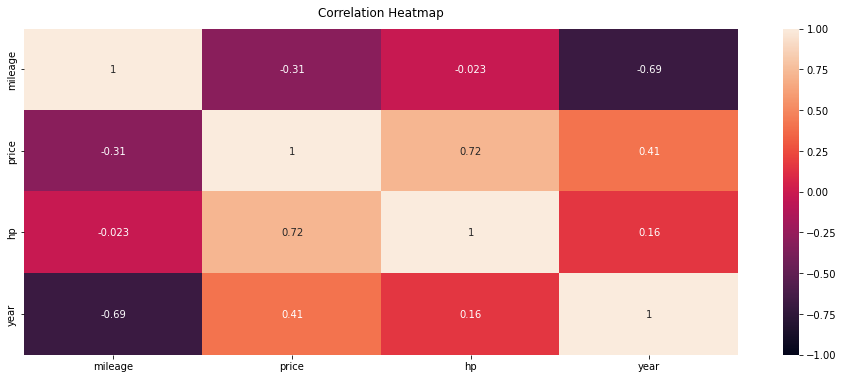

In [ ]:
# Mileage and Price

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sn.heatmap(new_dataset.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# sn.heatmap(mileage_price.corr());

In [ ]:
new_dataset.make.value_counts().head(20)

Volkswagen       7850
Opel             5407
Ford             5039
Audi             3302
Skoda            3227
Renault          3063
BMW              3035
Mercedes-Benz    2402
Hyundai          2234
SEAT             2194
Fiat             1895
Toyota           1391
Peugeot          1361
Kia              1134
smart            1084
Citroen          1006
Volvo             956
Nissan            915
Mazda             888
Dacia             832
Name: make, dtype: int64

In [ ]:
new_dataset.year.value_counts()

2019    6117
2020    5432
2018    5029
2016    4961
2017    4694
2015    4658
2013    4484
2014    4420
2012    4398
2011    4268
2021    4159
Name: year, dtype: int64

In [ ]:
# Use top 5 car make in quantity
new_dataset_top5 = new_dataset.loc[(new_dataset["make"]=='Volkswagen') | (new_dataset["make"]=='Opel') | (new_dataset["make"]=='Ford') | (new_dataset["make"]=='Audi') | (new_dataset["make"]=='Skoda')]
new_dataset_top5

,mileage,make,model,fuel,offerType,price,hp,year
1,92800.0,Volkswagen,Golf,Gasoline,Used,6877.000000,122.0,2011
7,127500.0,Opel,Zafira,Gasoline,Used,6972.000000,116.0,2011
9,104.0,Ford,Transit,Diesel,Used,6990.000000,86.0,2011
10,59580.0,Opel,Meriva,Diesel,Used,6990.000000,101.0,2011
11,84000.0,Volkswagen,Golf,Gasoline,Used,6990.000000,105.0,2011
...,...,...,...,...,...,...,...,...
52611,35000.0,Opel,Astra,Gasoline,Used,12405.038697,123.0,2018
52614,12142.0,Volkswagen,Tiguan,Gasoline,Employee's car,26536.907095,148.0,2019
52615,0.0,Volkswagen,T-Roc,Gasoline,New,29998.160888,296.0,2020
52616,110000.0,Volkswagen,Golf,Diesel,Used,10519.720466,148.0,2014


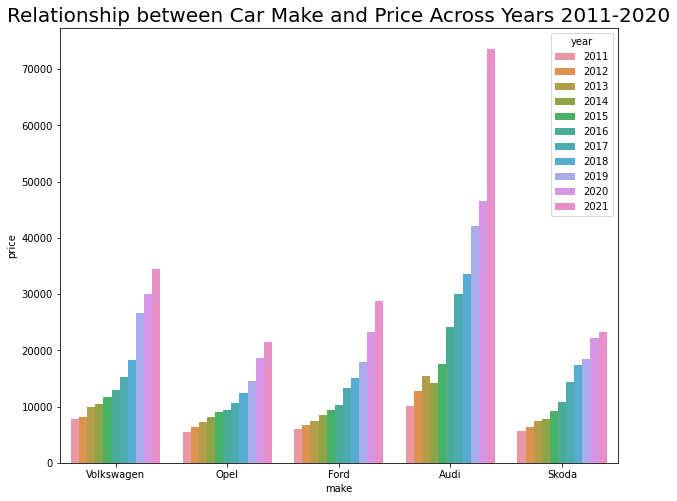

In [ ]:
#comparing make and price
# Set the figure size
plt.figure(figsize=(10, 8))
# grouped barplot
sn.barplot(x= "make", y = 'price', hue="year", data=new_dataset_top5, ci=None);
plt.title("Relationship between Car Make and Price Across Years 2011-2020", fontsize=20);
plt.show()

In [ ]:
# Use top 5 car make in quantity
new_dataset_top5_10 = new_dataset.loc[(new_dataset["make"]=='Renault') | (new_dataset["make"]=='BMW') | (new_dataset["make"]=='Mercedes-Benz') | (new_dataset["make"]=='Hyundai') | (new_dataset["make"]=='SEAT')]
new_dataset_top5_10

,mileage,make,model,fuel,offerType,price,hp,year
0,235000.0,BMW,316,Diesel,Used,6800.000000,116.0,2011
2,149300.0,SEAT,Exeo,Gasoline,Used,6900.000000,160.0,2011
3,96200.0,Renault,Megane,Gasoline,Used,6950.000000,110.0,2011
6,91894.0,Renault,Scenic,Diesel,Used,6970.000000,131.0,2011
12,427000.0,Mercedes-Benz,E 250,Diesel,Used,6990.000000,204.0,2011
...,...,...,...,...,...,...,...,...
52587,94456.0,BMW,320,Gasoline,Used,13217.205036,181.0,2013
52589,163675.0,BMW,320,Diesel,Used,16365.639344,188.0,2015
52592,74500.0,BMW,M4,Gasoline,Used,14578.995614,425.0,2014
52595,50.0,SEAT,Leon,Gasoline,Used,19484.411429,286.0,2019


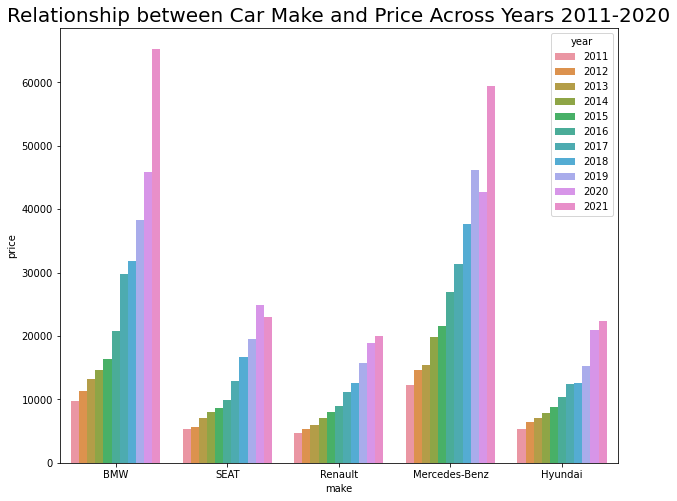

In [ ]:
#comparing make and price
# Set the figure size
plt.figure(figsize=(10, 8))
# grouped barplot
sn.barplot(x= "make", y = 'price', hue="year", data=new_dataset_top5_10, ci=None);
plt.title("Relationship between Car Make and Price Across Years 2011-2020", fontsize=20);
plt.show()

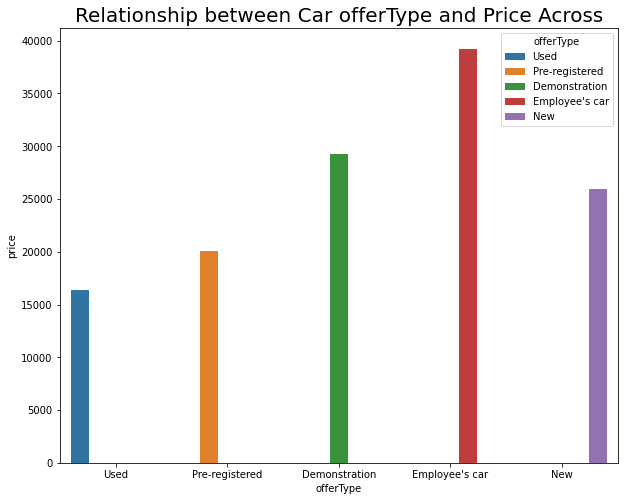

In [ ]:
#comparing offerType and price
# Set the figure size
plt.figure(figsize=(10, 8))
# grouped barplot
sn.barplot(x= "offerType", y = 'price', hue="offerType", data=new_dataset_top5_10, ci=None);
plt.title("Relationship between Car offerType and Price Across", fontsize=20);
plt.show()

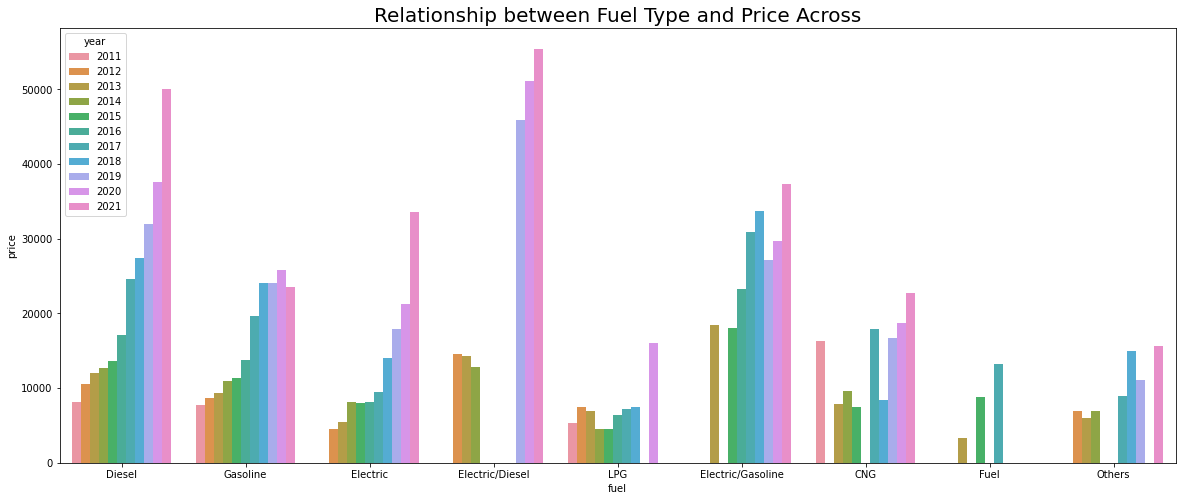

In [ ]:
#comparing Fuel and price
# Set the figure size
plt.figure(figsize=(20, 8))
# grouped barplot
sn.barplot(x= "fuel", y = 'price', hue="year", data=new_dataset_top5_10, ci=None);
plt.title("Relationship between Fuel Type and Price Across", fontsize=20);
plt.show()

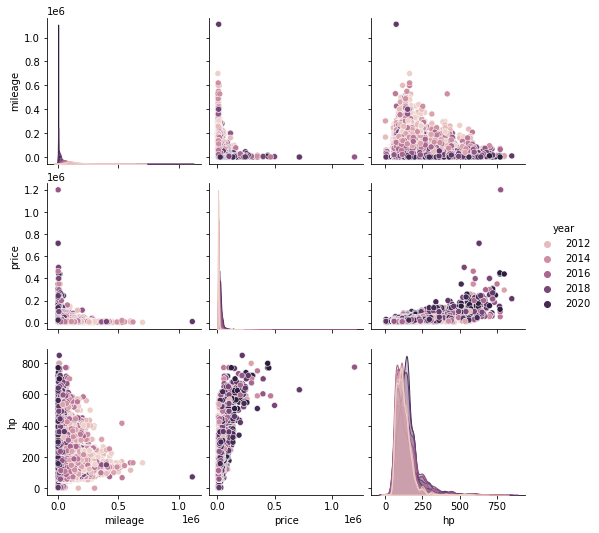

In [ ]:
sn.pairplot(new_dataset, hue='year')

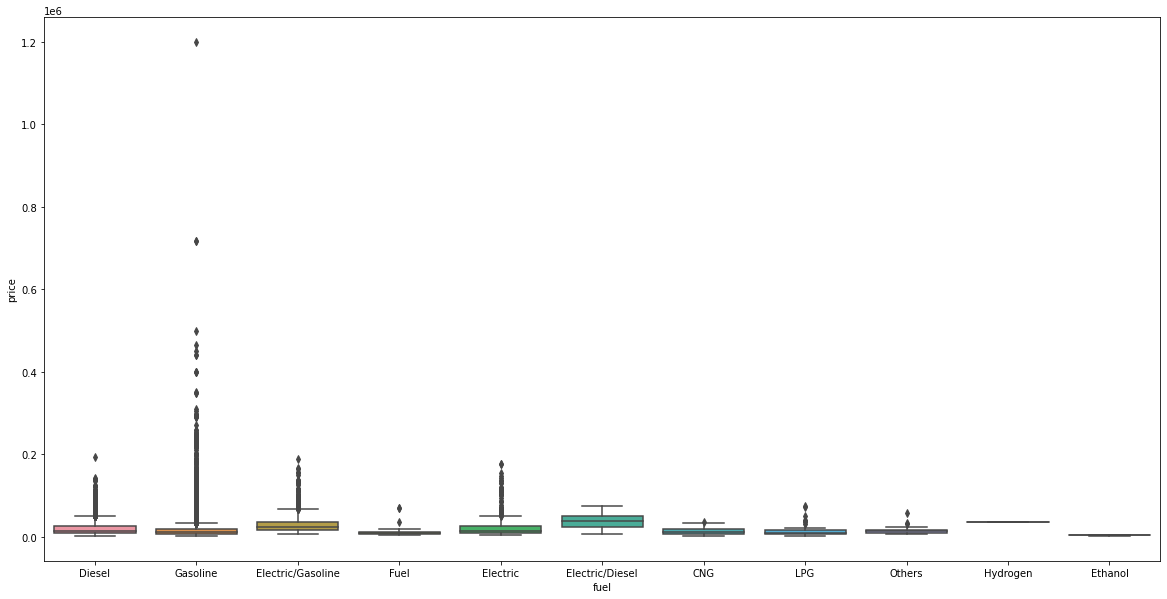

In [ ]:
# do I remove the outliers and classes?
plt.figure(figsize=(20, 10))
sn.boxplot(y='price',x='fuel',data=new_dataset)

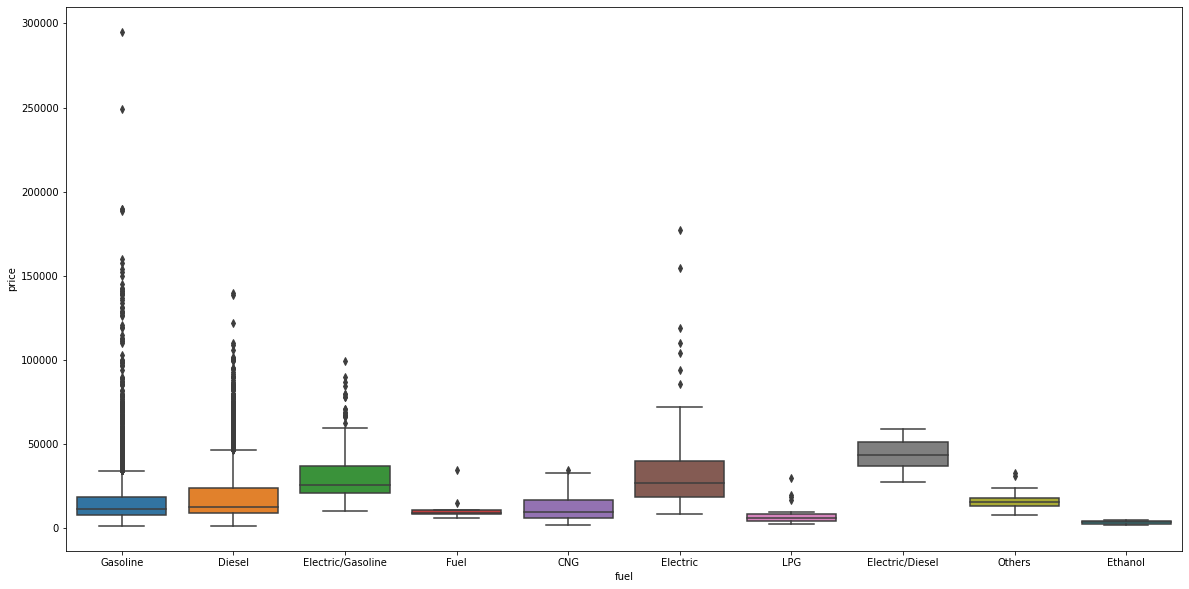

In [ ]:
plt.figure(figsize=(20, 10))
sn.boxplot(y='price',x='fuel',data=new_dataset_top5)

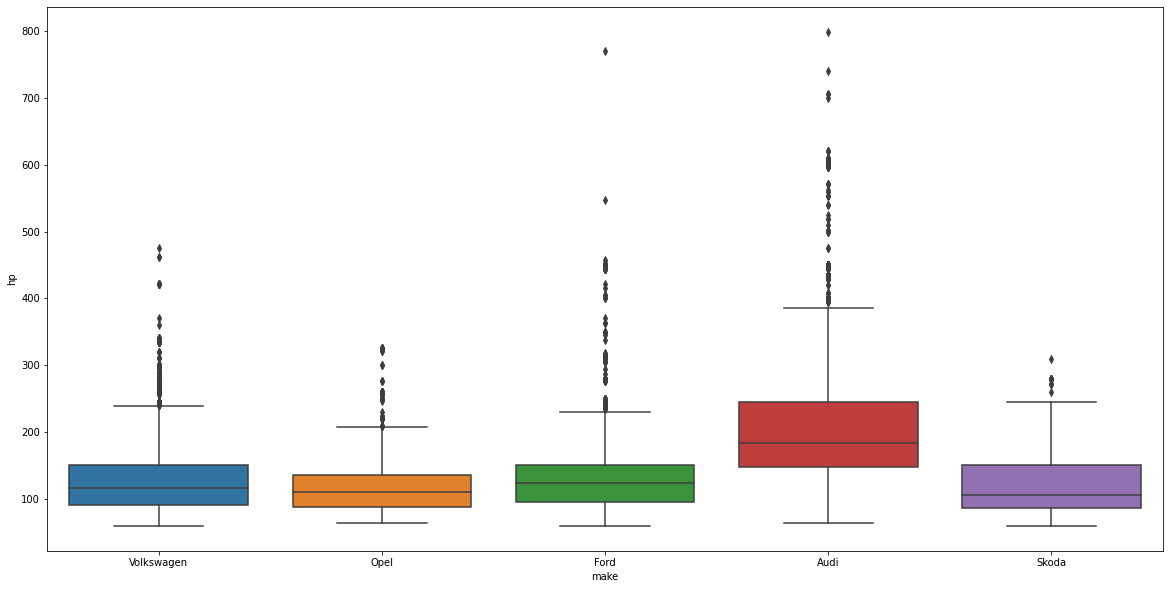

In [ ]:
plt.figure(figsize=(20, 10))
sn.boxplot(y='hp',x='make',data=new_dataset_top5)

# **Hypothesis Testing**

The null hypothesis would be that there is no significant relationship between the independent variables and the price (dependent variable). While the alternative hypothesis will be that there is a significant relationship between the independent variables and the price. 

In [ ]:
# germany_cars, combined_cars_rename_order

In [ ]:
new_dataset

,mileage,make,model,fuel,offerType,price,hp,year
0,235000.0,BMW,316,Diesel,Used,6800.000000,116.0,2011
1,92800.0,Volkswagen,Golf,Gasoline,Used,6877.000000,122.0,2011
2,149300.0,SEAT,Exeo,Gasoline,Used,6900.000000,160.0,2011
3,96200.0,Renault,Megane,Gasoline,Used,6950.000000,110.0,2011
4,156000.0,Peugeot,308,Gasoline,Used,6950.000000,156.0,2011
...,...,...,...,...,...,...,...,...
52615,0.0,Volkswagen,T-Roc,Gasoline,New,29998.160888,296.0,2020
52616,110000.0,Volkswagen,Golf,Diesel,Used,10519.720466,148.0,2014
52617,57000.0,Nissan,Pulsar,Diesel,Used,9764.921569,109.0,2015
52618,22500.0,Opel,Mokka,Gasoline,Used,9468.565141,114.0,2016


# Transform Categorical Variables 

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# ord_enc = OrdinalEncoder()
label_enc = LabelEncoder()
transformed_data = new_dataset.copy()
transformed_data["make_code"] = label_enc.fit_transform(transformed_data[["make"]])
transformed_data["model_code"] = label_enc.fit_transform(transformed_data[["model"]])
transformed_data["fuel_code"] = label_enc.fit_transform(transformed_data[["fuel"]])
transformed_data["offerType_code"] = label_enc.fit_transform(transformed_data[["offerType"]])
transformed_data.head(11)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,mileage,make,model,fuel,offerType,price,hp,year,make_code,model_code,fuel_code,offerType_code
0,235000.0,BMW,316,Diesel,Used,6800.0,116.0,2011,7,38,1,4
1,92800.0,Volkswagen,Golf,Gasoline,Used,6877.0,122.0,2011,70,415,7,4
2,149300.0,SEAT,Exeo,Gasoline,Used,6900.0,160.0,2011,61,340,7,4
3,96200.0,Renault,Megane,Gasoline,Used,6950.0,110.0,2011,59,529,7,4
4,156000.0,Peugeot,308,Gasoline,Used,6950.0,156.0,2011,54,37,7,4
5,147000.0,Toyota,Auris,Electric/Gasoline,Used,6950.0,99.0,2011,68,145,4,4
6,91894.0,Renault,Scenic,Diesel,Used,6970.0,131.0,2011,59,703,1,4
7,127500.0,Opel,Zafira,Gasoline,Used,6972.0,116.0,2011,52,844,7,4
8,115000.0,Mazda,3,Gasoline,Used,6980.0,150.0,2011,45,31,7,4
9,104.0,Ford,Transit,Diesel,Used,6990.0,86.0,2011,27,765,1,4


In [ ]:
encoded_data = transformed_data[['mileage','make_code','model_code','fuel_code','offerType_code','hp','year','price']]
encoded_data

,mileage,make_code,model_code,fuel_code,offerType_code,hp,year,price
0,235000.0,7,38,1,4,116.0,2011,6800.000000
1,92800.0,70,415,7,4,122.0,2011,6877.000000
2,149300.0,61,340,7,4,160.0,2011,6900.000000
3,96200.0,59,529,7,4,110.0,2011,6950.000000
4,156000.0,54,37,7,4,156.0,2011,6950.000000
...,...,...,...,...,...,...,...,...
52615,0.0,70,726,7,2,296.0,2020,29998.160888
52616,110000.0,70,415,1,4,148.0,2014,10519.720466
52617,57000.0,51,600,1,4,109.0,2015,9764.921569
52618,22500.0,52,538,7,4,114.0,2016,9468.565141


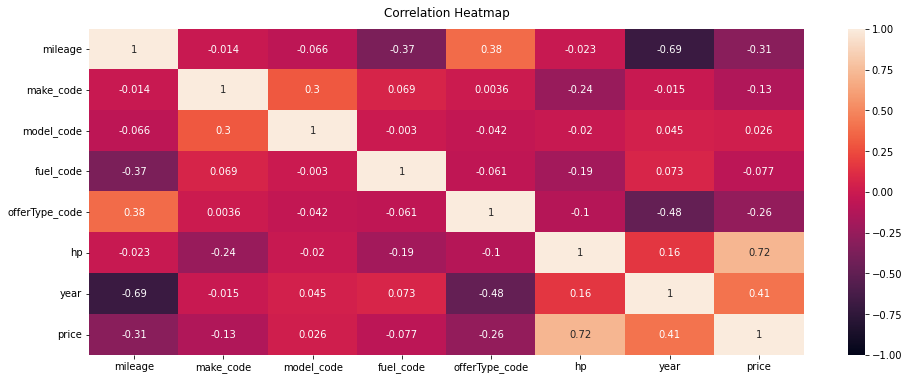

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sn.heatmap(encoded_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Split Into Train and Test

In [ ]:
X = encoded_data[['mileage','make_code','model_code','fuel_code','offerType_code','hp','year']]
Y = encoded_data['price']

In [ ]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle = True, random_state = 1000)

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("Y_train shape: {}".format(Y_train.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (36834, 7)
X_test shape: (15786, 7)
Y_train shape: (36834,)
Y_test shape: (15786,)


# **Muliple Linear regression**

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
predicted_price = regr.predict(X_test)
predicted_price = pd.DataFrame(predicted_price)
predicted_price = predicted_price.rename(columns = {0:'price'})
predicted_price

,price
0,29183.974052
1,1035.609521
2,54961.129643
3,5615.447508
4,23124.415896
...,...
15781,17898.573526
15782,16726.984530
15783,23702.167974
15784,858.757223


In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(Y_test,predicted_price)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(Y_test,predicted_price))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(Y_test,predicted_price)))

r2 score is  0.6908779079582142
mean_sqrd_error is== 99309087.11204539
root_mean_squared error of is== 9965.394478496342


In [ ]:
import statsmodels.api as sm

model = sm.OLS(Y_train, X_train).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                          1.805e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:12:08   Log-Likelihood:                     -3.9887e+05
No. Observations:               36834   AIC:                                  7.977e+05
Df Residuals:                   36827   BIC:                                  7.978e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

# **Improve R2 Score**

# Check if Data is Distibuted

In [ ]:
encoded_data

,mileage,make_code,model_code,fuel_code,offerType_code,hp,year,price
0,235000.0,7,38,1,4,116.0,2011,6800.000000
1,92800.0,70,415,7,4,122.0,2011,6877.000000
2,149300.0,61,340,7,4,160.0,2011,6900.000000
3,96200.0,59,529,7,4,110.0,2011,6950.000000
4,156000.0,54,37,7,4,156.0,2011,6950.000000
...,...,...,...,...,...,...,...,...
52615,0.0,70,726,7,2,296.0,2020,29998.160888
52616,110000.0,70,415,1,4,148.0,2014,10519.720466
52617,57000.0,51,600,1,4,109.0,2015,9764.921569
52618,22500.0,52,538,7,4,114.0,2016,9468.565141


In [ ]:
encoded_data_continuous = encoded_data[['mileage', 'hp', 'price']]
encoded_data_continuous

,mileage,hp,price
0,235000.0,116.0,6800.000000
1,92800.0,122.0,6877.000000
2,149300.0,160.0,6900.000000
3,96200.0,110.0,6950.000000
4,156000.0,156.0,6950.000000
...,...,...,...
52615,0.0,296.0,29998.160888
52616,110000.0,148.0,10519.720466
52617,57000.0,109.0,9764.921569
52618,22500.0,114.0,9468.565141


In [ ]:
encoded_data_continuous.describe()

,mileage,hp,price
count,5.262000e+04,52620.000000,5.262000e+04
mean,6.650635e+04,135.260243,1.701375e+04
std,6.184253e+04,75.561881,1.884377e+04
min,0.000000e+00,1.000000,1.100000e+03
25%,1.522600e+04,87.000000,7.897500e+03
50%,5.392650e+04,118.000000,1.195000e+04
75%,9.999900e+04,150.000000,2.045000e+04
max,1.111111e+06,850.000000,1.199900e+06


In [ ]:
old_skew = encoded_data_continuous.skew().sort_values(ascending=False)
old_skew

price      12.194043
hp          2.752529
mileage     1.416851
dtype: float64

Meaning

1.   Positive value - the distribution is skewed to the right
2.   Negative value - the distribution is skewed to the left
3.   Zero - perfect normal distribution

Please not: Normality test is only for continuous variables

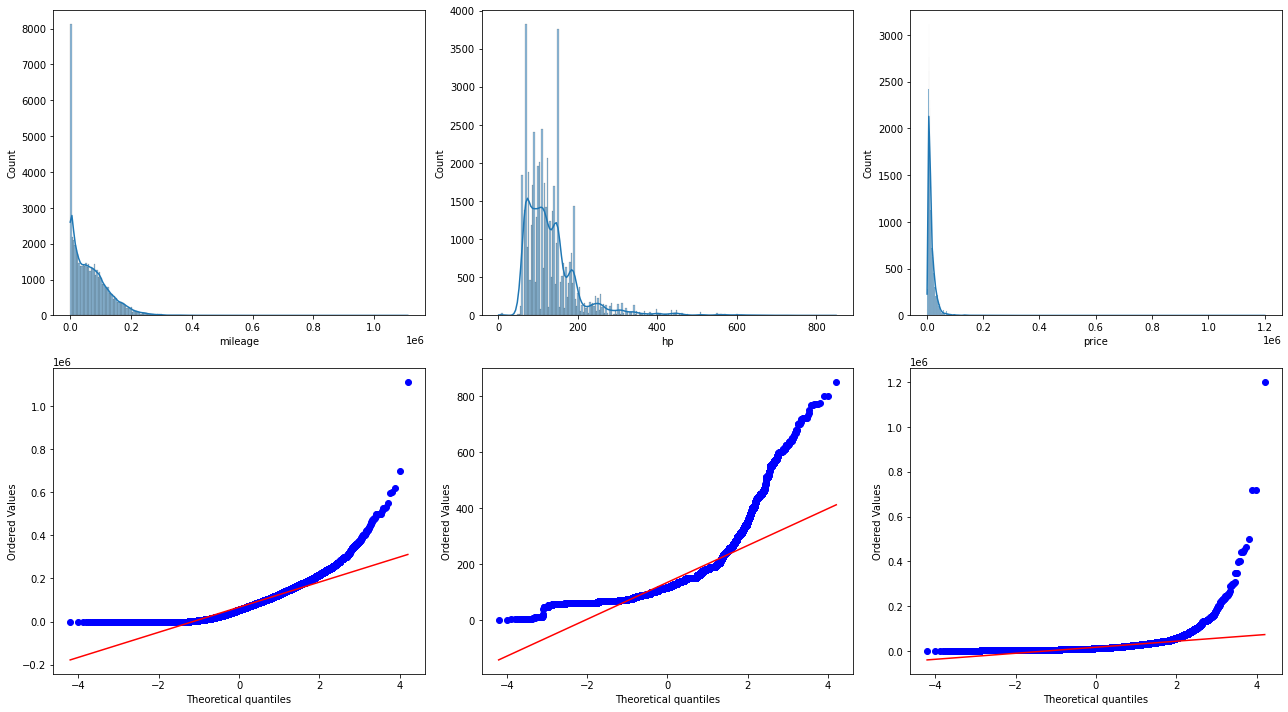

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(18,10))
for i in list(enumerate(encoded_data_continuous.columns)):
  plt.subplot(2, 3, i[0]+1)
  sn.histplot(data=encoded_data_continuous[i[1]], kde=True) # Histogram with KDE line

for i in list(enumerate(encoded_data_continuous.columns)):
  plt.subplot(2, 3,i[0]+4)
  stats.probplot(encoded_data_continuous[i[1]], dist="norm", plot=plt)   # QQ Plot
  plt.title("")
plt.tight_layout()  
plt.show()

# Log Transform

This works mainly for Right Skrewed data

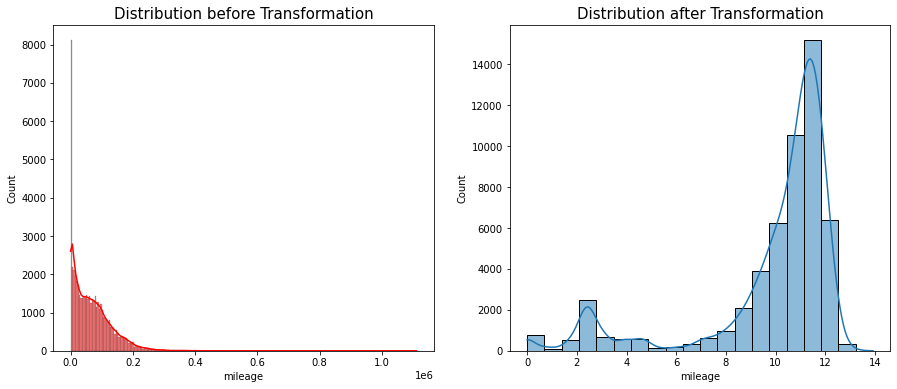

Skewness was 1.42 before & is -1.97 after Log transformation.


In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sn.histplot(encoded_data_continuous[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    encoded_data_log = pd.DataFrame(logTr.fit_transform(encoded_data_continuous))
    plt.title("Distribution after Transformation", fontsize=15)
    sn.histplot(encoded_data_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(encoded_data_log.skew()[0],2)} after Log transformation.")
    
logTrans(feature="mileage")

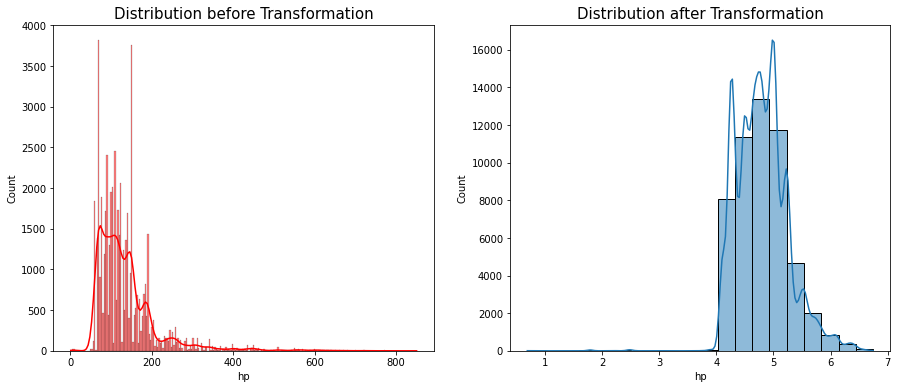

Skewness was 2.75 before & is 0.47 after Log transformation.


In [ ]:
logTrans(feature="hp")

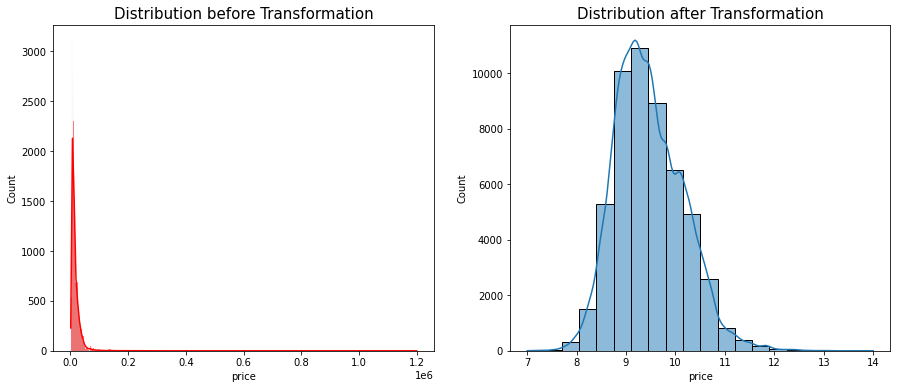

Skewness was 12.19 before & is 0.53 after Log transformation.


In [ ]:
logTrans(feature="price")

# Square Transform

This only works for Left skrewed data

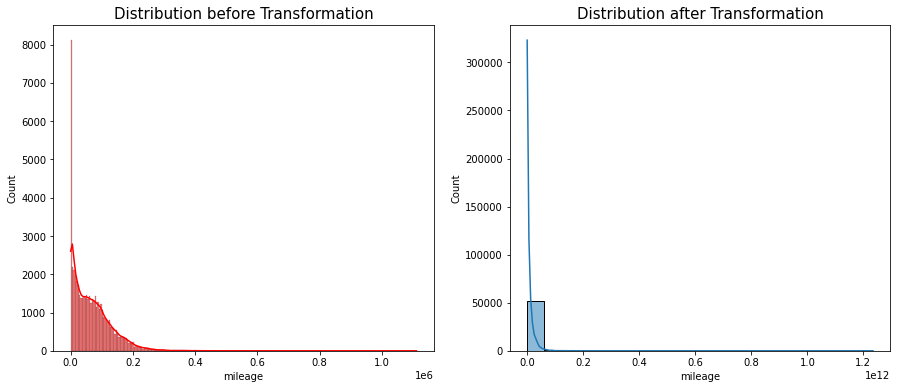

Skewness was 1.42 before & is 13.93 after Square transformation.


In [ ]:
def squareTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.square), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sn.histplot(encoded_data_continuous[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    encoded_data_continuous_square = pd.DataFrame(logTr.fit_transform(encoded_data_continuous))
    plt.title("Distribution after Transformation", fontsize=15)
    sn.histplot(encoded_data_continuous_square,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(encoded_data_continuous_square.skew()[0],2)} after Square transformation.")
    
squareTrans(feature="mileage")

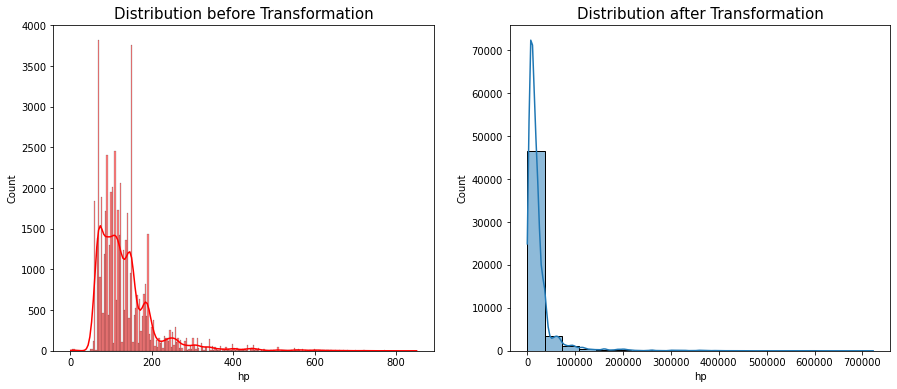

Skewness was 2.75 before & is 6.12 after Square transformation.


In [ ]:
squareTrans(feature="hp")

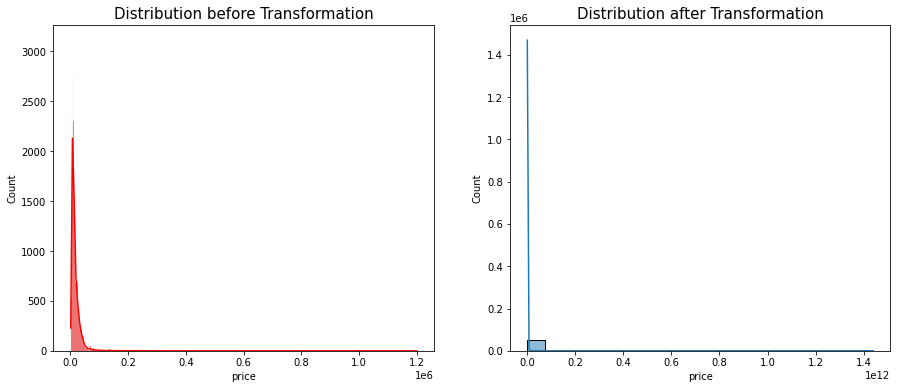

Skewness was 12.19 before & is 130.74 after Square transformation.


In [ ]:
squareTrans(feature="price")

# Cube Transform

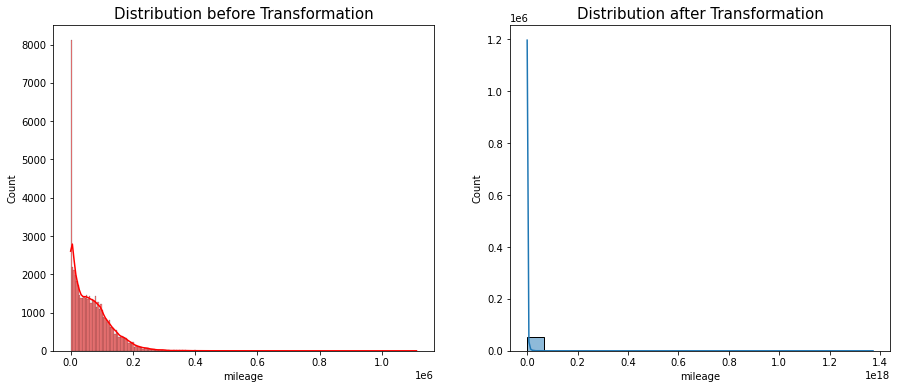

Skewness was 1.42 before & is 108.3 after cube transformation.


In [ ]:
def cubeTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(lambda x: x**3), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sn.histplot(encoded_data_continuous[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_cube = pd.DataFrame(logTr.fit_transform(encoded_data_continuous))
    plt.title("Distribution after Transformation", fontsize=15)
    sn.histplot(df_cube,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_cube.skew()[0],2)} after cube transformation.")
    
cubeTrans(feature="mileage")

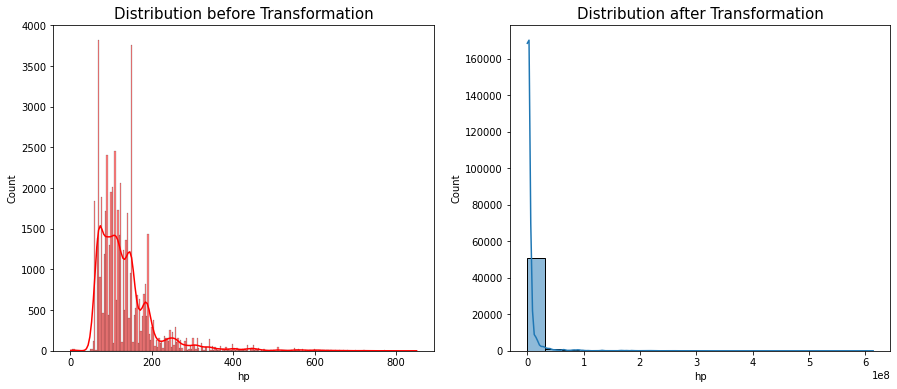

Skewness was 2.75 before & is 10.23 after cube transformation.


In [ ]:
cubeTrans(feature="hp")

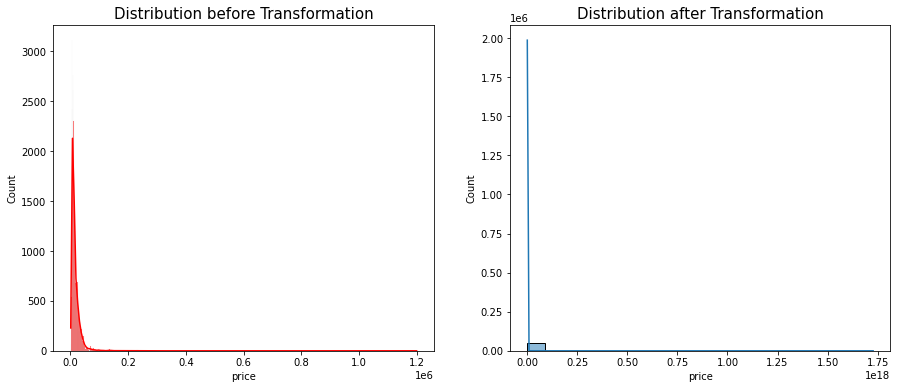

Skewness was 12.19 before & is 198.07 after cube transformation.


In [ ]:
cubeTrans(feature="price")

# Yeo-Johnson

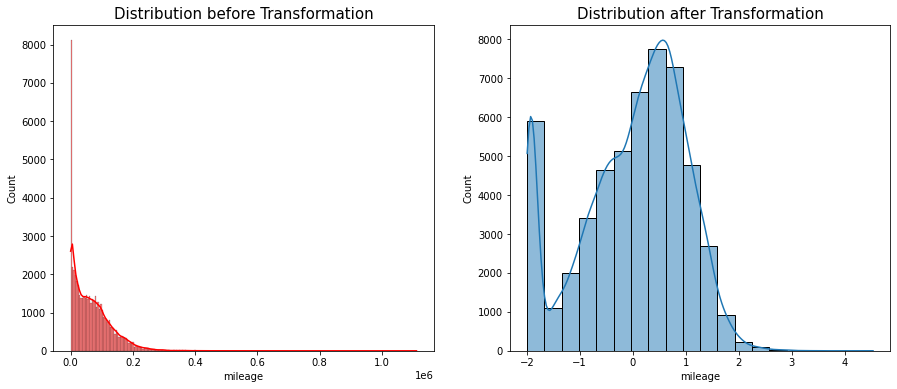

Skewness was 1.42 before & is -0.45 after Yeo-johnson transformation.


In [ ]:
from sklearn.preprocessing import PowerTransformer

def yeojohntrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    # the default method is yeo-johnson, so it is not necessary to put it
    yeojohnTr = PowerTransformer(method='yeo-johnson', standardize=True)

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sn.histplot(encoded_data_continuous[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(encoded_data_continuous[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sn.histplot(df_yeojohn,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")
    
yeojohntrans(feature="mileage")

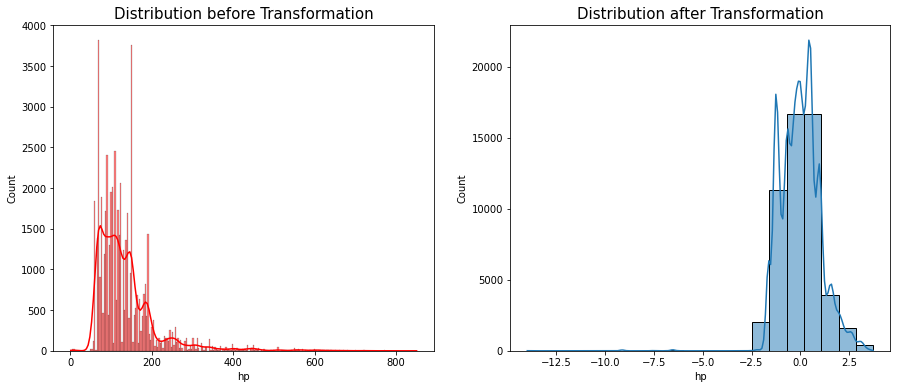

Skewness was 2.75 before & is -0.1 after Yeo-johnson transformation.


In [ ]:
yeojohntrans(feature="hp")

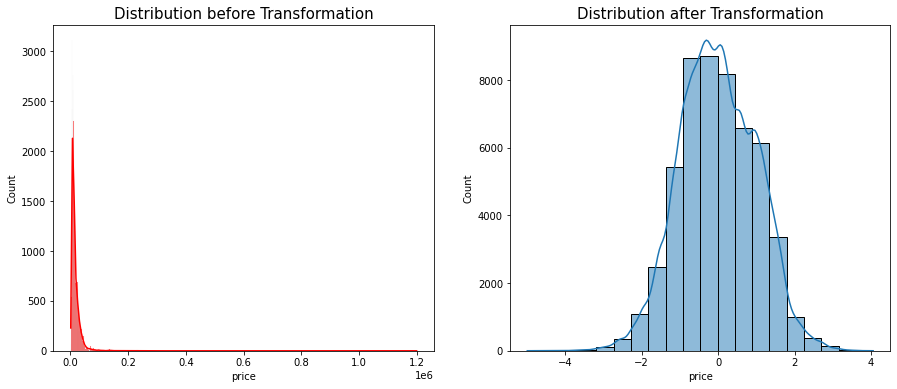

Skewness was 12.19 before & is 0.01 after Yeo-johnson transformation.


In [ ]:
yeojohntrans(feature="price")

In [ ]:
yeojohnTr = PowerTransformer(method='yeo-johnson', standardize=True)
df_yeojohn_num = pd.DataFrame(yeojohnTr.fit_transform(encoded_data_continuous))
df_yeojohn_num = df_yeojohn_num.rename(columns = {0:'mileage', 1:'hp', 2:'price'})
df_yeojohn_num

,mileage,hp,price
0,1.723002,-0.055455,-0.944056
1,0.655291,0.057932,-0.924452
2,1.157205,0.650373,-0.918650
3,0.690344,-0.175968,-0.906120
4,1.208014,0.596268,-0.906120
...,...,...,...
52615,-1.992673,1.891414,1.209245
52616,0.824995,0.482976,-0.224206
52617,0.222579,-0.196805,-0.341428
52618,-0.419253,-0.094794,-0.390606


In [ ]:
encoded_data_cat = encoded_data[['make_code','model_code','fuel_code','offerType_code','year']].reset_index()
encoded_data_cat = encoded_data_cat.drop(columns=['index'])
encoded_data_cat
# encoded_data_yeo_johnson = pd.concat([df_yeojohn,encoded_data_cat], axis="columns")
# encoded_data_yeo_johnson.fillna(df_yeojohn[['mileage', 'hp', 'price']])
# encoded_data_yeo_johnson

,make_code,model_code,fuel_code,offerType_code,year
0,7,38,1,4,2011
1,70,415,7,4,2011
2,61,340,7,4,2011
3,59,529,7,4,2011
4,54,37,7,4,2011
...,...,...,...,...,...
52615,70,726,7,2,2020
52616,70,415,1,4,2014
52617,51,600,1,4,2015
52618,52,538,7,4,2016


In [ ]:
encoded_data_yeo_johnson = pd.concat([df_yeojohn_num, encoded_data_cat], axis="columns")
encoded_data_yeo_johnson

,mileage,hp,price,make_code,model_code,fuel_code,offerType_code,year
0,1.723002,-0.055455,-0.944056,7,38,1,4,2011
1,0.655291,0.057932,-0.924452,70,415,7,4,2011
2,1.157205,0.650373,-0.918650,61,340,7,4,2011
3,0.690344,-0.175968,-0.906120,59,529,7,4,2011
4,1.208014,0.596268,-0.906120,54,37,7,4,2011
...,...,...,...,...,...,...,...,...
52615,-1.992673,1.891414,1.209245,70,726,7,2,2020
52616,0.824995,0.482976,-0.224206,70,415,1,4,2014
52617,0.222579,-0.196805,-0.341428,51,600,1,4,2015
52618,-0.419253,-0.094794,-0.390606,52,538,7,4,2016


# Split Data

In [ ]:
X1 = encoded_data_yeo_johnson[['mileage','make_code','model_code','fuel_code','offerType_code','hp','year']]
Y1 = encoded_data_yeo_johnson['price']

In [ ]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, shuffle = True, random_state = 1000)

print("X_train shape: {}".format(X1_train.shape))
print("X_test shape: {}".format(X1_test.shape))
print("Y_train shape: {}".format(Y1_train.shape))
print("Y_test shape: {}".format(Y1_test.shape))

X_train shape: (42096, 7)
X_test shape: (10524, 7)
Y_train shape: (42096,)
Y_test shape: (10524,)


In [ ]:
import statsmodels.api as sm

model1 = sm.OLS(Y1_train, X1_train).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                          1.904e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:12:44   Log-Likelihood:                         -29726.
No. Observations:               42096   AIC:                                  5.947e+04
Df Residuals:                   42089   BIC:                                  5.953e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

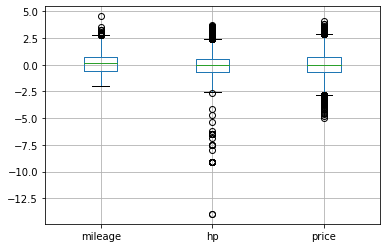

In [ ]:
df_yeojohn_num.boxplot()

In [ ]:
''' Detection '''
# IQR
for i in df_yeojohn_num.columns:
  Q1 = np.percentile(df_yeojohn_num[i], 25,
                    interpolation = 'midpoint')
  
  Q3 = np.percentile(df_yeojohn_num[i], 75,
                    interpolation = 'midpoint')
  IQR = Q3 - Q1
  
  print(f"Old {i} shape: ", df_yeojohn_num.shape)
  
  # Upper bound
  upper = np.where(df_yeojohn_num[i] >= (Q3+1.5*IQR))

  # Lower bound
  lower = np.where(df_yeojohn_num[i] <= (Q1-1.5*IQR))
  ''' Removing the Outliers '''
  df_copy = df_yeojohn_num.copy()
  df_copy.drop(upper[0], inplace = True)
  df_copy.drop(lower[0], inplace = True)
  
  print(f"New {i} shape: ", df_copy.shape)


Old mileage shape:  (52620, 3)
New mileage shape:  (52596, 3)
Old hp shape:  (52620, 3)
New hp shape:  (51587, 3)
Old price shape:  (52620, 3)
New price shape:  (52400, 3)


In [ ]:
Q1 = df_yeojohn_num.quantile(0.25)
Q3 = df_yeojohn_num.quantile(0.75)
IQR = Q3 - Q1

df = df_yeojohn_num[~((df_yeojohn_num < (Q1 - 1.5 * IQR)) |(df_yeojohn_num > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,mileage,hp,price
0,1.723002,-0.055455,-0.944056
1,0.655291,0.057932,-0.924452
2,1.157205,0.650373,-0.918650
3,0.690344,-0.175968,-0.906120
4,1.208014,0.596268,-0.906120
...,...,...,...
52615,-1.992673,1.891414,1.209245
52616,0.824995,0.482976,-0.224206
52617,0.222579,-0.196805,-0.341428
52618,-0.419253,-0.094794,-0.390606


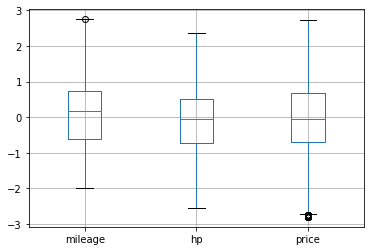

In [ ]:
df.boxplot()

In [ ]:
new_df = pd.concat([df, encoded_data_cat], axis="columns")
new_df

,mileage,hp,price,make_code,model_code,fuel_code,offerType_code,year
0,1.723002,-0.055455,-0.944056,7,38,1,4,2011
1,0.655291,0.057932,-0.924452,70,415,7,4,2011
2,1.157205,0.650373,-0.918650,61,340,7,4,2011
3,0.690344,-0.175968,-0.906120,59,529,7,4,2011
4,1.208014,0.596268,-0.906120,54,37,7,4,2011
...,...,...,...,...,...,...,...,...
52615,-1.992673,1.891414,1.209245,70,726,7,2,2020
52616,0.824995,0.482976,-0.224206,70,415,1,4,2014
52617,0.222579,-0.196805,-0.341428,51,600,1,4,2015
52618,-0.419253,-0.094794,-0.390606,52,538,7,4,2016


In [ ]:
new_df = new_df.dropna().reset_index()
new_df = new_df.drop(columns=['index'])
new_df

,mileage,hp,price,make_code,model_code,fuel_code,offerType_code,year
0,1.723002,-0.055455,-0.944056,7,38,1,4,2011
1,0.655291,0.057932,-0.924452,70,415,7,4,2011
2,1.157205,0.650373,-0.918650,61,340,7,4,2011
3,0.690344,-0.175968,-0.906120,59,529,7,4,2011
4,1.208014,0.596268,-0.906120,54,37,7,4,2011
...,...,...,...,...,...,...,...,...
51424,-1.992673,1.891414,1.209245,70,726,7,2,2020
51425,0.824995,0.482976,-0.224206,70,415,1,4,2014
51426,0.222579,-0.196805,-0.341428,51,600,1,4,2015
51427,-0.419253,-0.094794,-0.390606,52,538,7,4,2016


In [ ]:
X2 = new_df[['mileage','make_code','model_code','fuel_code','offerType_code','hp','year']]
Y2 = new_df['price']

In [ ]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, shuffle = True, random_state = 50)

print("X_train shape: {}".format(X2_train.shape))
print("X_test shape: {}".format(X2_test.shape))
print("Y_train shape: {}".format(Y2_train.shape))
print("Y_test shape: {}".format(Y2_test.shape))

X_train shape: (41143, 7)
X_test shape: (10286, 7)
Y_train shape: (41143,)
Y_test shape: (10286,)


In [ ]:
import statsmodels.api as sm

model2 = sm.OLS(Y2_train, X2_train).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                          1.915e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:12:45   Log-Likelihood:                         -26421.
No. Observations:               41143   AIC:                                  5.286e+04
Df Residuals:                   41136   BIC:                                  5.292e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
import statsmodels.api as sm

X2_train_ = sm.add_constant(X2_train)
model2 = sm.OLS(Y2_train, X2_train_).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 2.999e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:12:45   Log-Likelihood:                -18991.
No. Observations:               41143   AIC:                         3.800e+04
Df Residuals:                   41135   BIC:                         3.807e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -284.8697      2.130   -133.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#extract p-values for all predictor variables
for x in range (0, 7):
    print(model2.pvalues[x])

0.0
0.0
1.58415021286654e-05
0.6424750263316659
1.8011446085179891e-168
1.495459433477485e-22
0.0


In [ ]:
model2.pvalues.loc['make_code']

1.58415021286654e-05

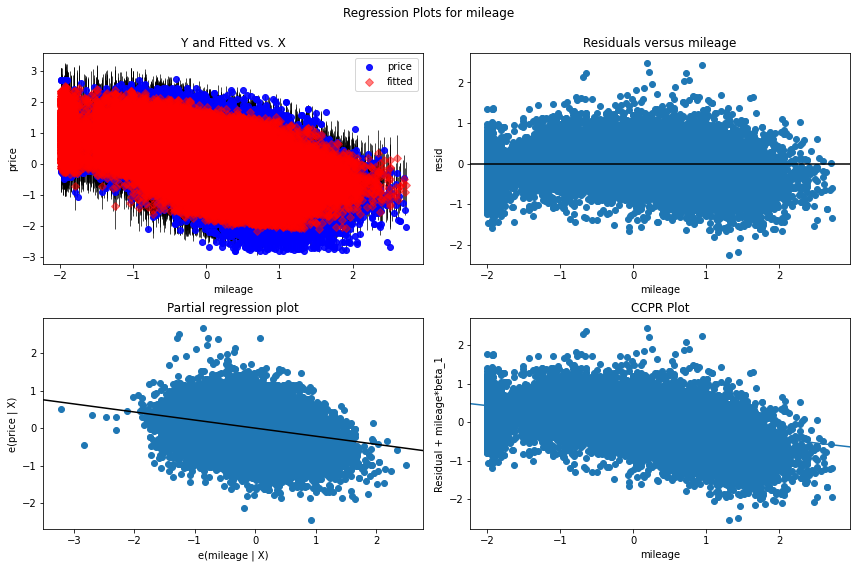

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'mileage', fig=fig)

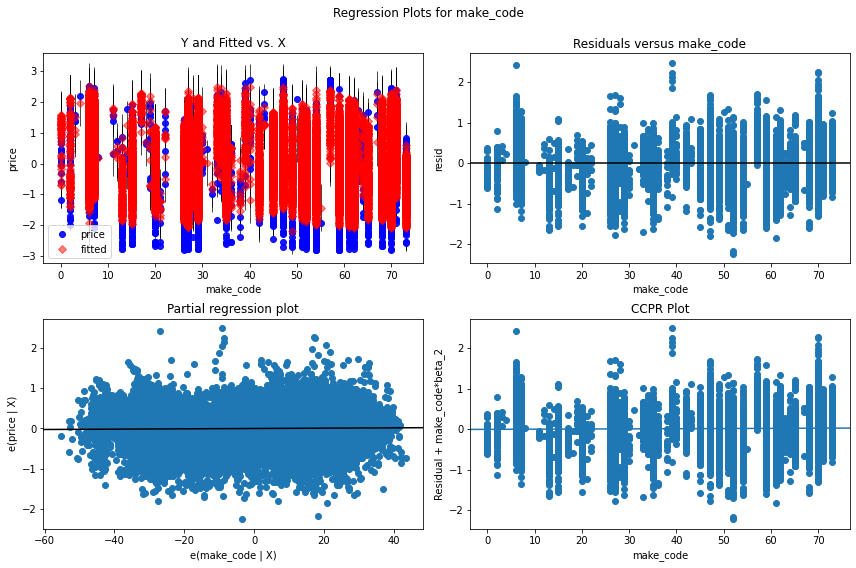

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'make_code', fig=fig)

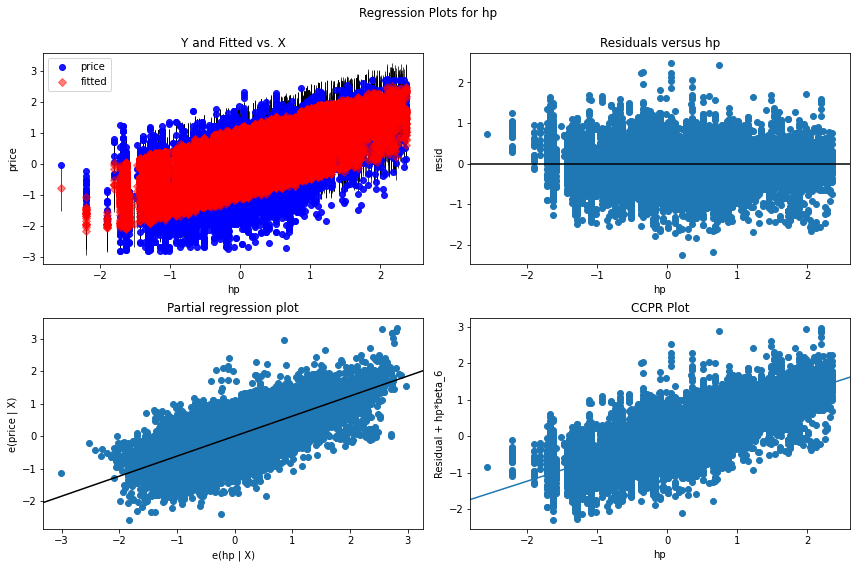

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'hp', fig=fig)

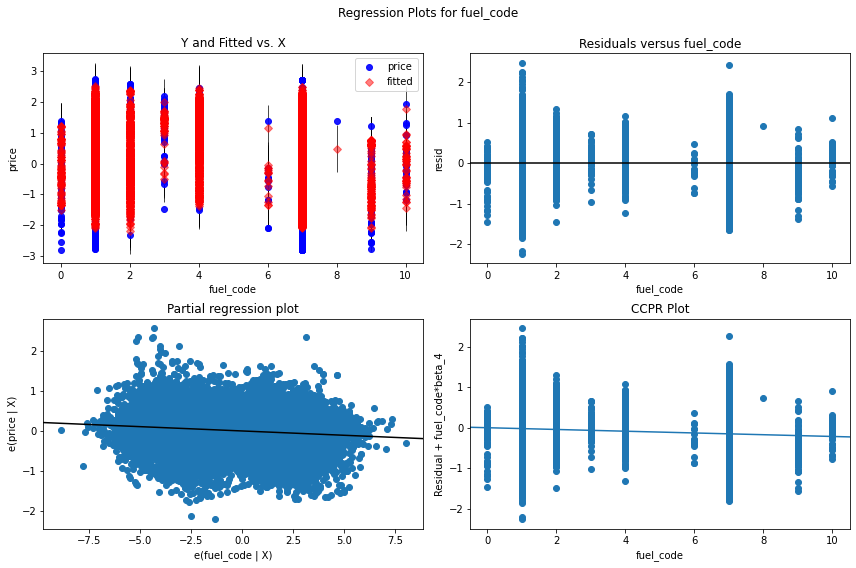

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'fuel_code', fig=fig)

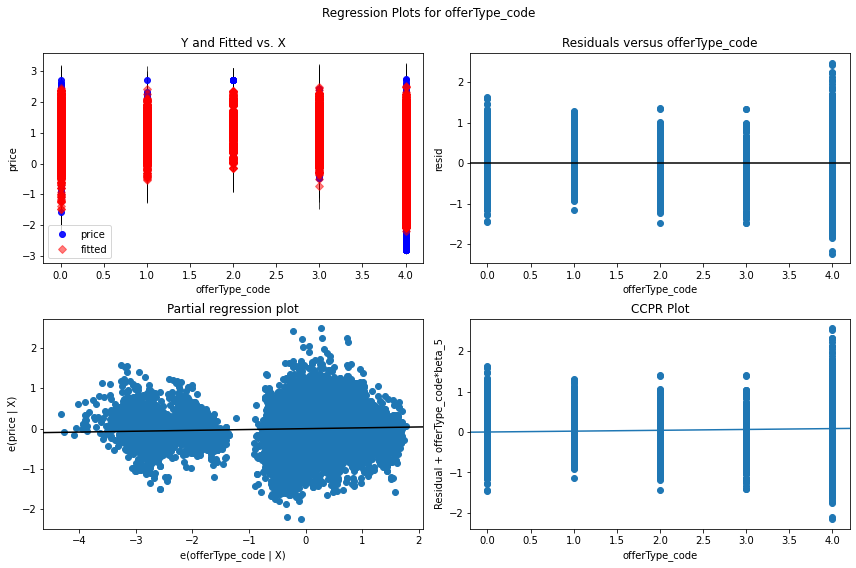

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'offerType_code', fig=fig)

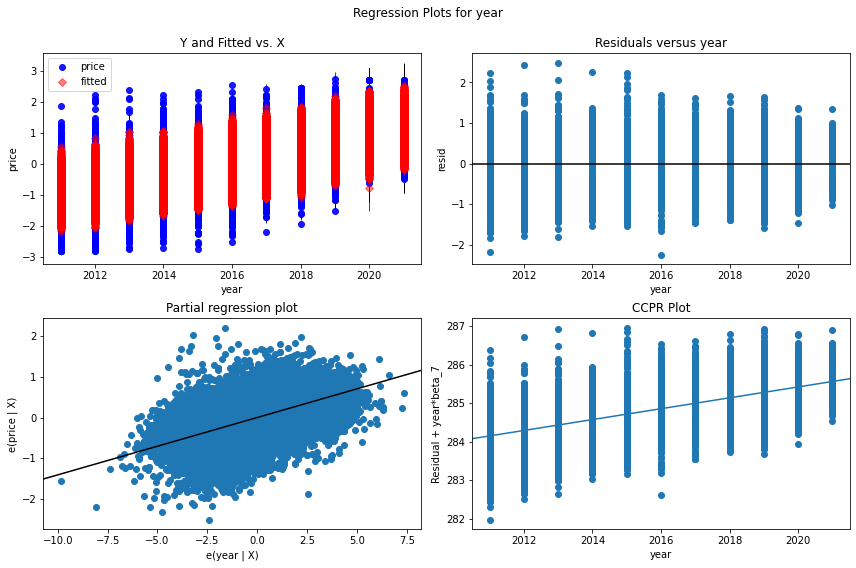

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'year', fig=fig)

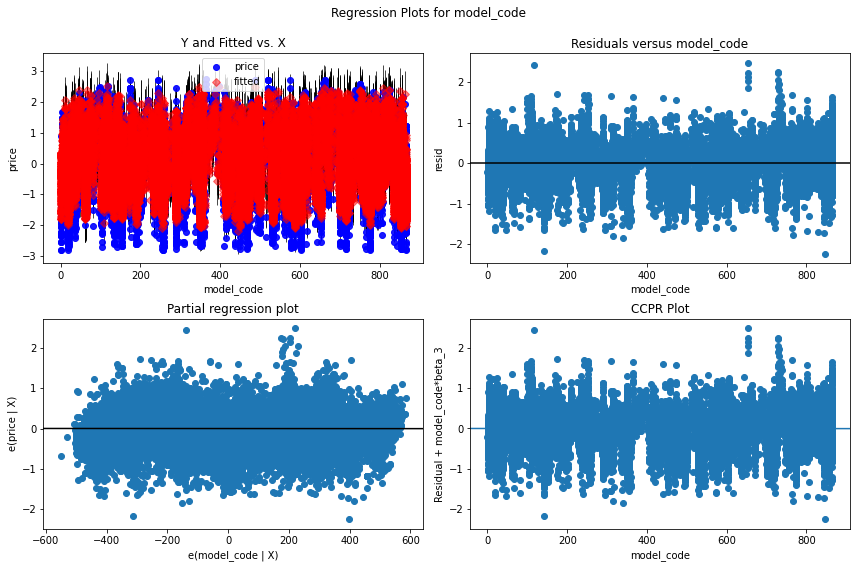

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'model_code', fig=fig)

In [ ]:
X2_test_ = sm.add_constant(X2_test)
ypred = model2.predict(X2_test_).to_frame()
ypred = ypred.rename(columns={0:'price'})
ypred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,price
39908,-0.258325
47257,0.834697
25960,0.566317
5744,1.472612
43461,1.049969
...,...
8179,-0.907618
36641,0.066209
34553,-0.455376
28700,-1.548855


In [ ]:
Savedlambda = yeojohnTr.lambdas_
Savedlambda

array([ 0.35953432, -0.1876842 , -0.255872  ])

In [ ]:
X_ = pd.DataFrame(X2_test)
X_ = X_[['mileage', 'hp']]
ypred[['mileage', 'hp']] = X_
ypred = ypred[['mileage','hp','price']]
ypred

,mileage,hp,price
39908,0.636400,-0.514557,-0.258325
47257,-0.836025,0.482976,0.834697
25960,-0.004196,0.362218,0.566317
5744,-0.966716,1.011148,1.472612
43461,-1.128380,0.596268,1.049969
...,...,...,...
8179,-0.094327,-1.633556,-0.907618
36641,-0.445475,0.298747,0.066209
34553,0.243777,0.362218,-0.455376
28700,0.924758,-0.922687,-1.548855


In [ ]:
predictions = pd.DataFrame(yeojohnTr.inverse_transform(ypred))
predictions = predictions.rename(columns={0:'mileage',1:'hp', 2:'predicted_price'})
predictions

,mileage,hp,predicted_price
0,91000.0,95.0,10292.685680
1,9823.0,148.0,22177.987290
2,42472.0,140.0,18104.966502
3,7129.0,190.0,37653.219363
4,4520.0,156.0,26306.961580
...,...,...,...
10281,37438.0,60.0,6943.998199
10282,21500.0,136.0,12731.270457
10283,58500.0,140.0,9095.269867
10284,121000.0,80.0,4877.196395


In [ ]:
Y2_test = Y2_test.to_frame()
Y2_test

,price
39908,-0.474247
47257,0.580407
25960,1.010897
5744,1.536523
43461,1.284931
...,...
8179,-0.668598
36641,0.008694
34553,-0.127266
28700,-2.266269


In [ ]:
X_real = pd.DataFrame(X2_test)
X_real = X_real[['mileage', 'hp']]
Y2_test[['mileage', 'hp']] = X_real
Y2_test = Y2_test[['mileage','hp','price']]
Y2_test


,mileage,hp,price
39908,0.636400,-0.514557,-0.474247
47257,-0.836025,0.482976,0.580407
25960,-0.004196,0.362218,1.010897
5744,-0.966716,1.011148,1.536523
43461,-1.128380,0.596268,1.284931
...,...,...,...
8179,-0.094327,-1.633556,-0.668598
36641,-0.445475,0.298747,0.008694
34553,0.243777,0.362218,-0.127266
28700,0.924758,-0.922687,-2.266269


In [ ]:
original_data = pd.DataFrame(yeojohnTr.inverse_transform(Y2_test))
original_data = original_data.rename(columns={0:'mileage',1:'hp', 2:'real_price'})
original_data.head(10)

,mileage,hp,real_price
0,91000.0,95.0,8990.000000
1,9823.0,148.0,18294.145299
2,42472.0,140.0,25490.000000
3,7129.0,190.0,39870.000000
4,4520.0,156.0,31980.000000
5,22328.0,148.0,18294.145299
6,48435.0,116.0,10850.000000
7,64350.0,69.0,6990.000000
8,2.0,178.0,29288.000000
9,32076.0,109.0,17524.368421


In [ ]:
real_price_ = pd.DataFrame(original_data['real_price'])
predicted_price_ = pd.DataFrame(predictions['predicted_price'])
frames = [real_price_, predicted_price_]
comparison = pd.concat(frames, axis="columns")
comparison.head(10)

,real_price,predicted_price
0,8990.000000,10292.685680
1,18294.145299,22177.987290
2,25490.000000,18104.966502
3,39870.000000,37653.219363
4,31980.000000,26306.961580
5,18294.145299,20712.792354
6,10850.000000,10288.186489
7,6990.000000,6900.653509
8,29288.000000,40740.804287
9,17524.368421,10888.659418


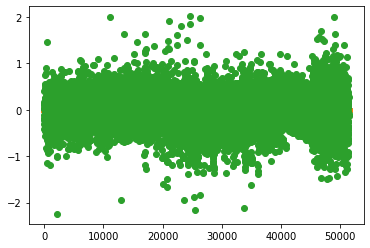

In [ ]:
g=plt.plot(Y2_test - ypred,marker='o',linestyle='')
g

In [ ]:
# X3 = new_df[['mileage','make_code','model_code','fuel_code','offerType_code','hp','year']]
# Y3 = new_df['price']

In [ ]:
# selecting years between 2011 - 2019 for training the model so that it is the same as the first dataset and for the price range to fit
car_years_train = new_df.loc[(new_df["year"]>=2011) & (new_df["year"]<=2020)]
car_years_train

,mileage,hp,price,make_code,model_code,fuel_code,offerType_code,year
0,1.723002,-0.055455,-0.944056,7,38,1,4,2011
1,0.655291,0.057932,-0.924452,70,415,7,4,2011
2,1.157205,0.650373,-0.918650,61,340,7,4,2011
3,0.690344,-0.175968,-0.906120,59,529,7,4,2011
4,1.208014,0.596268,-0.906120,54,37,7,4,2011
...,...,...,...,...,...,...,...,...
51424,-1.992673,1.891414,1.209245,70,726,7,2,2020
51425,0.824995,0.482976,-0.224206,70,415,1,4,2014
51426,0.222579,-0.196805,-0.341428,51,600,1,4,2015
51427,-0.419253,-0.094794,-0.390606,52,538,7,4,2016


In [ ]:
X3_train = car_years_train[['mileage','make_code','model_code','fuel_code','offerType_code','hp','year']]
Y3_train = car_years_train['price']

In [ ]:
X3_train

,mileage,make_code,model_code,fuel_code,offerType_code,hp,year
0,1.723002,7,38,1,4,-0.055455,2011
1,0.655291,70,415,7,4,0.057932,2011
2,1.157205,61,340,7,4,0.650373,2011
3,0.690344,59,529,7,4,-0.175968,2011
4,1.208014,54,37,7,4,0.596268,2011
...,...,...,...,...,...,...,...
51424,-1.992673,70,726,7,2,1.891414,2020
51425,0.824995,70,415,1,4,0.482976,2014
51426,0.222579,51,600,1,4,-0.196805,2015
51427,-0.419253,52,538,7,4,-0.094794,2016


In [ ]:
Y3_train.shape

(47421,)

In [ ]:
car_years_test = new_df.loc[(new_df["year"]==2021)]
car_years_test

,mileage,hp,price,make_code,model_code,fuel_code,offerType_code,year
190,-1.805158,-1.283839,-0.212362,26,577,7,3,2021
191,-1.917338,-1.283839,-0.200671,26,577,4,3,2021
192,-1.905075,-1.178986,-0.180044,68,154,7,3,2021
193,-1.917338,-1.283839,-0.157789,26,577,4,3,2021
194,-1.917338,-1.283839,-0.157789,26,577,4,3,2021
...,...,...,...,...,...,...,...,...
45196,-1.805985,-1.213360,0.096012,26,61,4,3,2021
45197,-1.805985,-1.213360,0.096012,26,61,4,3,2021
45198,-1.805985,-1.213360,0.096012,26,61,4,3,2021
45199,-1.805985,-1.213360,0.096012,26,61,4,3,2021


In [ ]:
X3_test = car_years_test[['mileage','make_code','model_code','fuel_code','offerType_code','hp','year']]
Y3_test = car_years_test['price']

In [ ]:
X3_test

,mileage,make_code,model_code,fuel_code,offerType_code,hp,year
190,-1.805158,26,577,7,3,-1.283839,2021
191,-1.917338,26,577,4,3,-1.283839,2021
192,-1.905075,68,154,7,3,-1.178986,2021
193,-1.917338,26,577,4,3,-1.283839,2021
194,-1.917338,26,577,4,3,-1.283839,2021
...,...,...,...,...,...,...,...
45196,-1.805985,26,61,4,3,-1.213360,2021
45197,-1.805985,26,61,4,3,-1.213360,2021
45198,-1.805985,26,61,4,3,-1.213360,2021
45199,-1.805985,26,61,4,3,-1.213360,2021


In [ ]:
Y3_test.shape

(4008,)

In [ ]:
import statsmodels.api as sm

X3_train_ = sm.add_constant(X3_train)
model3 = sm.OLS(Y3_train, X3_train_).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                 3.256e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:13:06   Log-Likelihood:                -22571.
No. Observations:               47421   AIC:                         4.516e+04
Df Residuals:                   47413   BIC:                         4.523e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -288.3300      1.959   -147.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#extract p-values for all predictor variables
for x in range (0, 8):
    print(model3.pvalues[x])

0.0
0.0
7.940788589404953e-06
0.2640637244236653
7.531616691210901e-187
8.967817848171448e-40
0.0
0.0


In [ ]:
# there is a bug with sm.add_constant
X3_test['const']=1.0
X3_test_ =  X3_test[['const','mileage','make_code','model_code','fuel_code','offerType_code','hp','year']]
ypred3 = model3.predict(X3_test_).to_frame()
ypred3 = ypred3.rename(columns={0:'price'})
ypred3

,price
190,0.284722
191,0.376319
192,0.394360
193,0.376319
194,0.376319
...,...
45196,0.396442
45197,0.396442
45198,0.396442
45199,0.396442


In [ ]:
X3_ = pd.DataFrame(X3_test)
X3_ = X3_[['mileage', 'hp']]
ypred3[['mileage', 'hp']] = X3_
ypred3 = ypred3[['mileage','hp','price']]
ypred3

,mileage,hp,price
190,-1.805158,-1.283839,0.284722
191,-1.917338,-1.283839,0.376319
192,-1.905075,-1.178986,0.394360
193,-1.917338,-1.283839,0.376319
194,-1.917338,-1.283839,0.376319
...,...,...,...
45196,-1.805985,-1.213360,0.396442
45197,-1.805985,-1.213360,0.396442
45198,-1.805985,-1.213360,0.396442
45199,-1.805985,-1.213360,0.396442


In [ ]:
predictions3 = pd.DataFrame(yeojohnTr.inverse_transform(ypred3))
predictions3 = predictions3.rename(columns={0:'mileage',1:'hp', 2:'predicted_price'})
predictions3

,mileage,hp,predicted_price
0,100.0,69.0,14791.169801
1,15.0,69.0,15778.489573
2,20.0,72.0,15982.606713
3,15.0,69.0,15778.489573
4,15.0,69.0,15778.489573
...,...,...,...
4003,99.0,71.0,16006.376444
4004,99.0,71.0,16006.376444
4005,99.0,71.0,16006.376444
4006,99.0,71.0,16006.376444


In [ ]:
Y3_test = Y3_test.to_frame()
Y3_test

,price
190,-0.212362
191,-0.200671
192,-0.180044
193,-0.157789
194,-0.157789
...,...
45196,0.096012
45197,0.096012
45198,0.096012
45199,0.096012


In [ ]:
X3_real = pd.DataFrame(X3_test)
X3_real = X3_real[['mileage', 'hp']]
Y3_test[['mileage', 'hp']] = X3_real
Y3_test = Y3_test[['mileage','hp','price']]
Y3_test

,mileage,hp,price
190,-1.805158,-1.283839,-0.212362
191,-1.917338,-1.283839,-0.200671
192,-1.905075,-1.178986,-0.180044
193,-1.917338,-1.283839,-0.157789
194,-1.917338,-1.283839,-0.157789
...,...,...,...
45196,-1.805985,-1.213360,0.096012
45197,-1.805985,-1.213360,0.096012
45198,-1.805985,-1.213360,0.096012
45199,-1.805985,-1.213360,0.096012


In [ ]:
original_data3 = pd.DataFrame(yeojohnTr.inverse_transform(Y3_test))
original_data3 = original_data3.rename(columns={0:'mileage',1:'hp', 2:'real_price'})
original_data3

,mileage,hp,real_price
0,100.0,69.0,10600.0
1,15.0,69.0,10680.0
2,20.0,72.0,10823.0
3,15.0,69.0,10980.0
4,15.0,69.0,10980.0
...,...,...,...
4003,99.0,71.0,12990.0
4004,99.0,71.0,12990.0
4005,99.0,71.0,12990.0
4006,99.0,71.0,12990.0


In [ ]:
real_price3_ = pd.DataFrame(original_data3['real_price'])
predicted_price3_ = pd.DataFrame(predictions3['predicted_price'])
frames3 = [real_price3_, predicted_price3_]
comparison3 = pd.concat(frames3, axis="columns")
comparison3.head(20)

,real_price,predicted_price
0,10600.0,14791.169801
1,10680.0,15778.489573
2,10823.0,15982.606713
3,10980.0,15778.489573
4,10980.0,15778.489573
5,10997.0,16059.860896
6,11490.0,16069.838137
7,11490.0,16069.838137
8,11490.0,16069.838137
9,11499.0,14324.252265


In [ ]:
errors = pd.DataFrame({"errors" : comparison3["real_price"] - comparison3["predicted_price"]})
errors[["real_price", "predicted_price"]] = comparison3
errors.reset_index(inplace=True)
errors

,index,errors,real_price,predicted_price
0,0,-4191.169801,10600.0,14791.169801
1,1,-5098.489573,10680.0,15778.489573
2,2,-5159.606713,10823.0,15982.606713
3,3,-4798.489573,10980.0,15778.489573
4,4,-4798.489573,10980.0,15778.489573
...,...,...,...,...
4003,4003,-3016.376444,12990.0,16006.376444
4004,4004,-3016.376444,12990.0,16006.376444
4005,4005,-3016.376444,12990.0,16006.376444
4006,4006,-3016.376444,12990.0,16006.376444


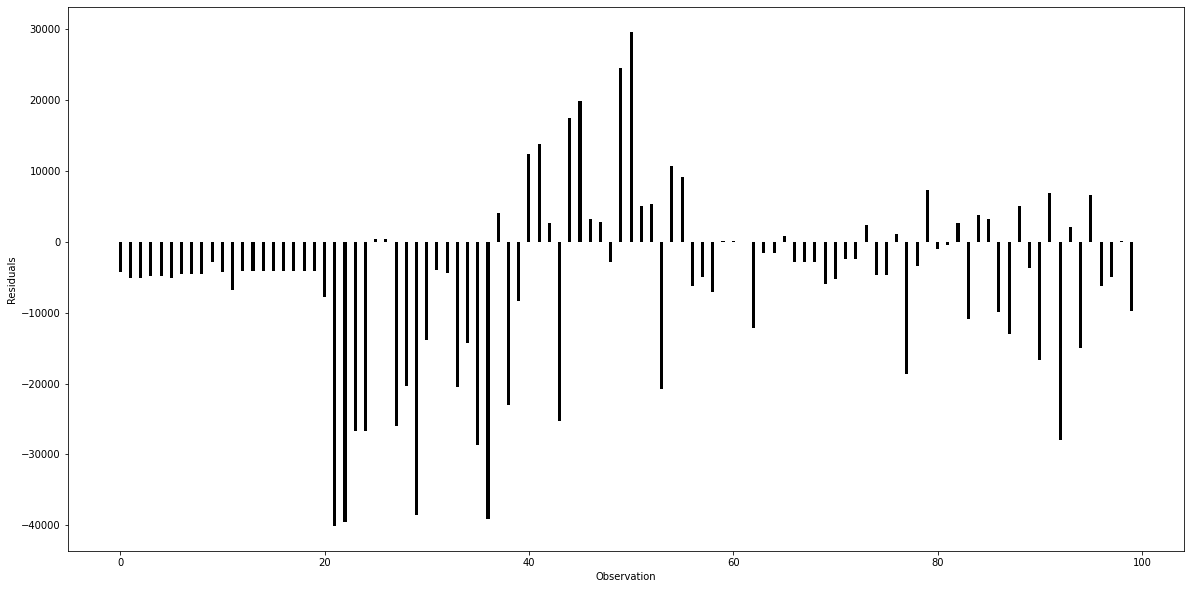

In [ ]:
# plot the residuals

fig = plt.figure(figsize=(20,10))
plt.bar('index', 'errors', data=errors[:100], color='black', width=0.3)
plt.xlabel("Observation")
plt.ylabel("Residuals")
plt.show()
plt.rcParams.update({'font.size': 30})